# Initialize

In [1]:
visible_devices = [1]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

sys.path.insert(0,'../utils_func/')
import MixtureDistributions # type: ignore

sys.path.insert(0,'../')
import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std, compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "../results/"
if not os.path.exists(results_dir):
    print("WARNING: Results directory does not exist")
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-04-12 07:34:00.793656: Importing os...
2024-04-12 07:34:00.794008: Importing sys...
Visible devices: [1]
2024-04-12 07:34:00.794171: Importing timer from timeit...
2024-04-12 07:34:00.794218: Setting env variables for tf import (only device(s) [1] will be available)...
2024-04-12 07:34:00.794305: Importing numpy...
2024-04-12 07:34:00.875933: Importing matplotlib...


2024-04-12 07:34:01.345955: Importing h5py...
2024-04-12 07:34:01.359709: Importing importlib.util...
2024-04-12 07:34:01.359776: Importing json...
2024-04-12 07:34:01.359818: Importing pandas...
2024-04-12 07:34:01.554833: Importing random...
2024-04-12 07:34:01.554933: Importing scipy utils...
2024-04-12 07:34:01.808807: Importing subprocess...
2024-04-12 07:34:01.808902: Importing tensorflow...
Tensorflow version: 2.12.0
2024-04-12 07:34:03.186799: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-04-12 07:34:03.364099: Importing timeit...
2024-04-12 07:34:03.364165: Importing tqdm...
2024-04-12 07:34:03.366216: Importing typing...
2024-04-12 07:34:03.366295: Setting tf configs...
2024-04-12 07:34:03.579802: Importing GMetrics module...
2024-04-12 07:34:06.361664: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #1, model: NVIDIA A40
Loaded 1 GPUs: ['NVIDIA A40']
2024-04-12 07:34:06.415296: All done.


# Fixed $n=10000$

## Null hypotheses

### Model definition

In [5]:
seed = 0
ncomp = 5
ndims = 20
niter = 10_000
batch_size_test = 10_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (20,) (20,)


In [6]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [7]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 100000000
batch_size 10000
niter 10000
niter * batch_size 100000000
small_sample False


In [8]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               block_size = 10_000,
                               num_batches = 1,
                               batch_size = 10_000)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [9]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

niter  batch_size_test  batch_size_gen  small_sample_threshold dtype_input  \
0  10000            10000           10000                10000000     float64   

   seed  use_tf  mirror_strategy strategy  verbose  ...  ndims_1  nsamples_1  \
0     0    True            False     None     True  ...       20           0   

   is_symb_2  ndims_2  nsamples_2    dtype ndims   nsamples  small_sample  \
0       True       20           0  float64    20  100000000         False   

   ncomp  
0      5  

[1 rows x 21 columns]

In [10]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1000,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 1000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1000,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 1000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 10000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 20,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 20,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 20,
   'nsamples': 100000000,
   'small_sample': False,
   'ncomp': 5},
  'max_vectorize': 1000,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results/20D_10K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_key': '

### Evaluate null hypotheses

In [11]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from ../results/20D_10K/null_hypothesis/FN.json
Loading fpd from ../results/20D_10K/null_hypothesis/FPD.json
Loading kpd from ../results/20D_10K/null_hypothesis/KPD.json
Loading ks from ../results/20D_10K/null_hypothesis/KS.json


Loading sks from ../results/20D_10K/null_hypothesis/SKS.json
Loading swd from ../results/20D_10K/null_hypothesis/SWD.json


In [12]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.6792931553721728], [0.95, [9500, 500], 0.9588317477652443], [0.99, [9900, 100], 1.1541763500213065]]
Computing time for metric fn: 90.4602883539992
ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.6669445748113885], [0.95, [9500, 500], 1.3217846893085319], [0.99, [9900, 100], 1.9605548728214763]]
Computing time for metric fpd: 512.0768792470008
ThresholdS for metric kpd: [[0.68, [6800, 3199], 0.14945605649963056], [0.95, [9500, 500], 0.5554041217079586], [0.99, [9900, 100], 0.9197941468475079]]
Computing time for metric kpd: 2027.844381424
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9174711429984861], [0.95, [9500, 500], 1.1808682942358035], [0.99, [9900, 100], 1.370019820554133]]
Computing time for metric ks: 446.48794806799924
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9090568803073205], [0.95, [9500, 500], 1.1593018835616806], [0.99, [9900, 100], 1.3432204571688977]]
Computing time for metric sks: 1125.7361449819982
T

name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7fc0bd691240>   
1          metric_list  <function <lambda> at 0x7fc0bd693130>   
2          metric_list  <function <lambda> at 0x7fc0bd692170>   
3      statistic_means  <function <lambda> at 0x7fc0bd6931c0>   
4         metric_means  <function <lambda> at 0x7fc0bd693250>   
5         metric_means  <function <lambda> at 0x7fc0bd6932e0>   
6  lik_ratio_norm_list  <function <lambda> at 0x7fc0bd693370>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1               lambda ns, ndims: 1000   
2               lambda ns, ndims: 1000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 10000, 'ba...           1000   
1  {'niter': 10000, 'batch_size_test': 10000, 'ba...            200   
2  {'niter': 10000, 'batch_size_test': 10000, 'ba...             10   
3  {'niter': 10000, 'batch_size_test': 10000, 'ba...          10000   
4  {'niter': 10000, 'batch_size_test': 10000, 'ba...            200   
5  {'niter': 10000, 'batch_size_test': 10000, 'ba...            200   
6  {'niter': 10000, 'batch_size_test': 10000, 'ba...            200   

                        latex                                    null_file  \
0  $\overline{\|\cdot\|}_{F}$   ../results/20D_10K/null_hypothesis/FN.json   
1          $d_{\mathrm{FPD}}$  ../results/20D_10K/null_hypothesis/FPD.json   
2          $d_{\mathrm{KPD}}$  ../results/20D_10K/null_hypothesis/KPD.json   
3              $\overline{D}$   ../results/20D_10K/null_hypothesis/KS.json   
4             $\widetilde{D}$  ../results/20D_10K/null_hypothesis/SKS.json   
5             $\widetilde{W}$  ../results/20D_10K/null_hypothesis/SWD.json   
6                   $t_{\mu}$   ../results/20D_10K/null_hypothesis/LR.json   

                                          thresholds  
0  [[0.68, [6800, 3199], 0.6792931553721728], [0....  
1  [[0.68, [6800, 3199], 0.6669445748113885], [0....  
2  [[0.68, [6800, 3199], 0.14945605649963056], [0...  
3  [[0.68, [6800, 3199], 0.9174711429984861], [0....  
4  [[0.68, [6800, 3199], 0.9090568803073205], [0....  
5  [[0.68, [6800, 3199], 0.6922491767525255], [0....  
6                                                 []

### Plots of null-distributions

mu = 0.6120894762056157 +/- 0.00036367819656170114
sigma = 0.1907034862192354 +/- 0.0016164403869004266


/tmp/ipykernel_15764/379088798.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_15764/379088798.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_15764/379088798.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_15764/379088798.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


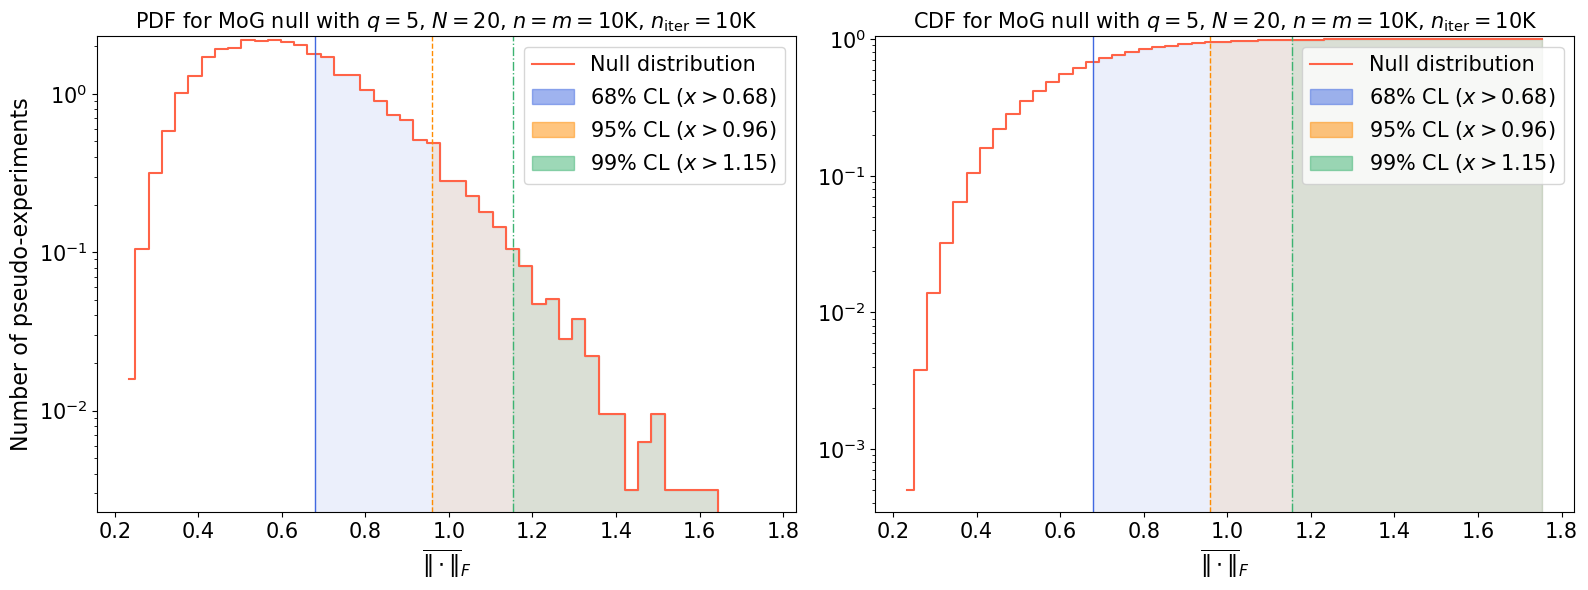

Time elapsed: 1.340813295013504 seconds.
mu = 0.5752881947169551 +/- 0.0015649503276510487
sigma = 0.3955945307573209 +/- 0.004808078620866064


/tmp/ipykernel_15764/379088798.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_15764/379088798.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_15764/379088798.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_15764/379088798.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


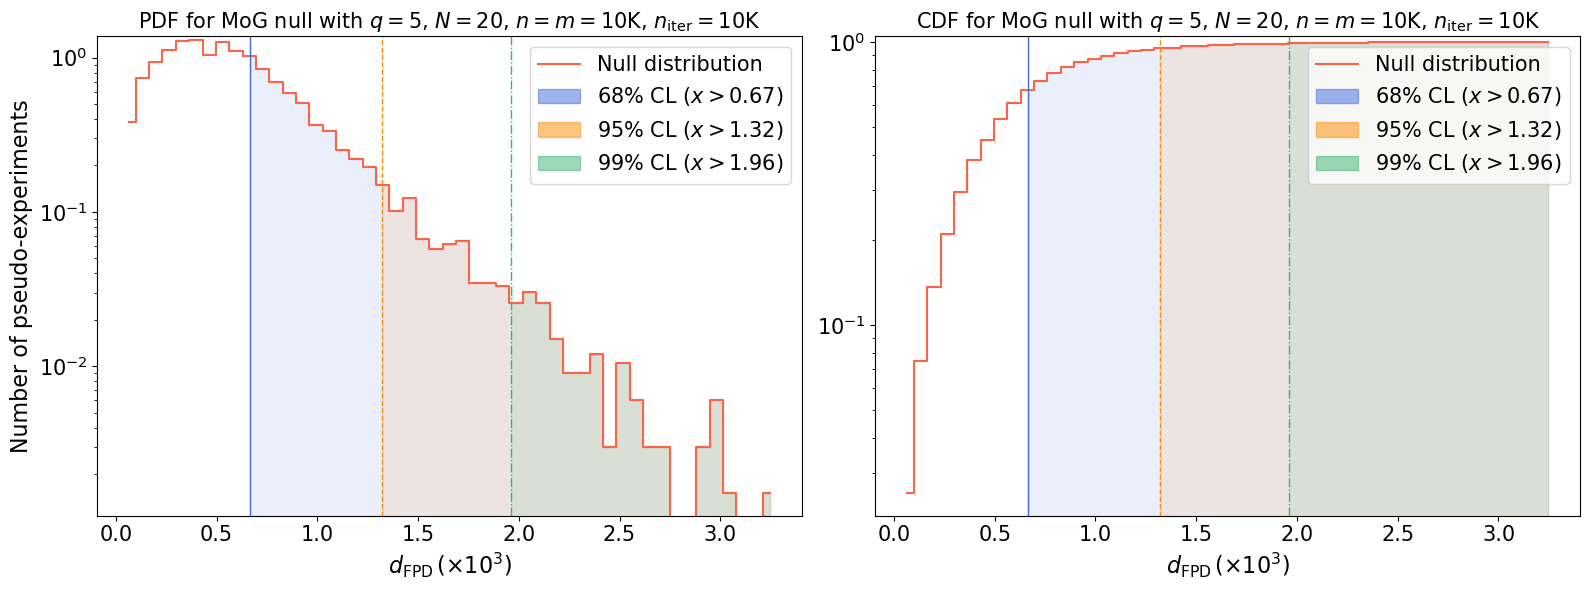

Time elapsed: 0.9794418370001949 seconds.
mu = 0.12325748020678154 +/- 0.000482104826198401
sigma = 0.21956885621563024 +/- 0.0035113815190549666


/tmp/ipykernel_15764/379088798.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_15764/379088798.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_15764/379088798.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


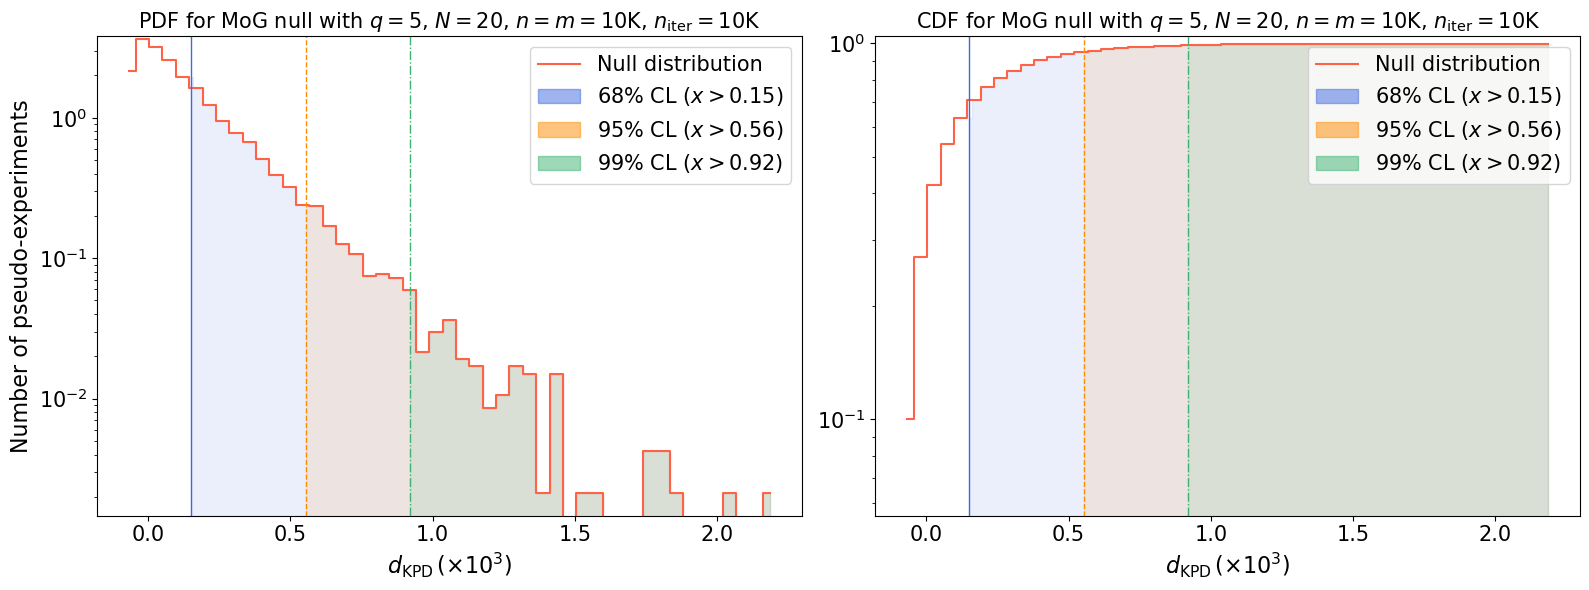

Time elapsed: 0.8674845999921672 seconds.
mu = 0.8661184235829871 +/- 0.0002688223305601763
sigma = 0.1639580222374545 +/- 0.0014492966451468332


/tmp/ipykernel_15764/379088798.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_15764/379088798.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_15764/379088798.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_15764/379088798.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


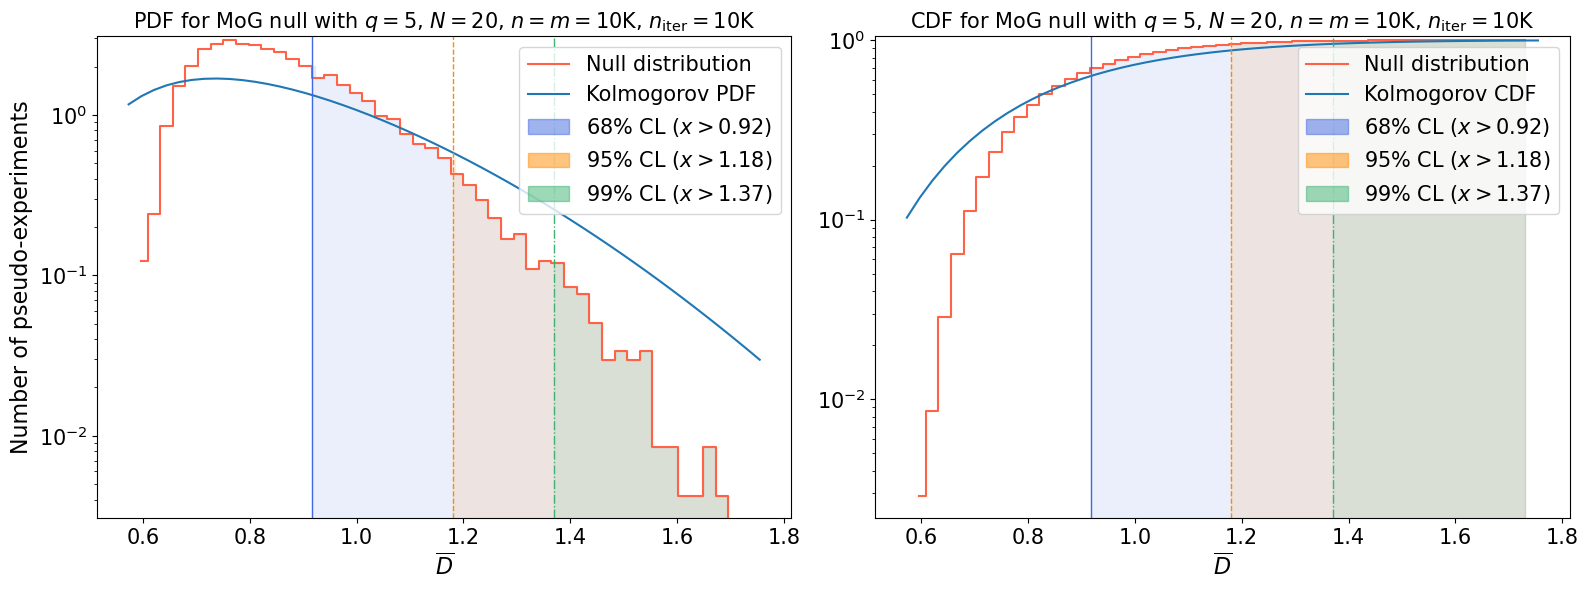

Time elapsed: 1.2595387390174437 seconds.
mu = 0.8644640350571903 +/- 0.0002347751242327214
sigma = 0.15322373322456329 +/- 0.0014248537469858798


/tmp/ipykernel_15764/379088798.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_15764/379088798.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_15764/379088798.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_15764/379088798.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


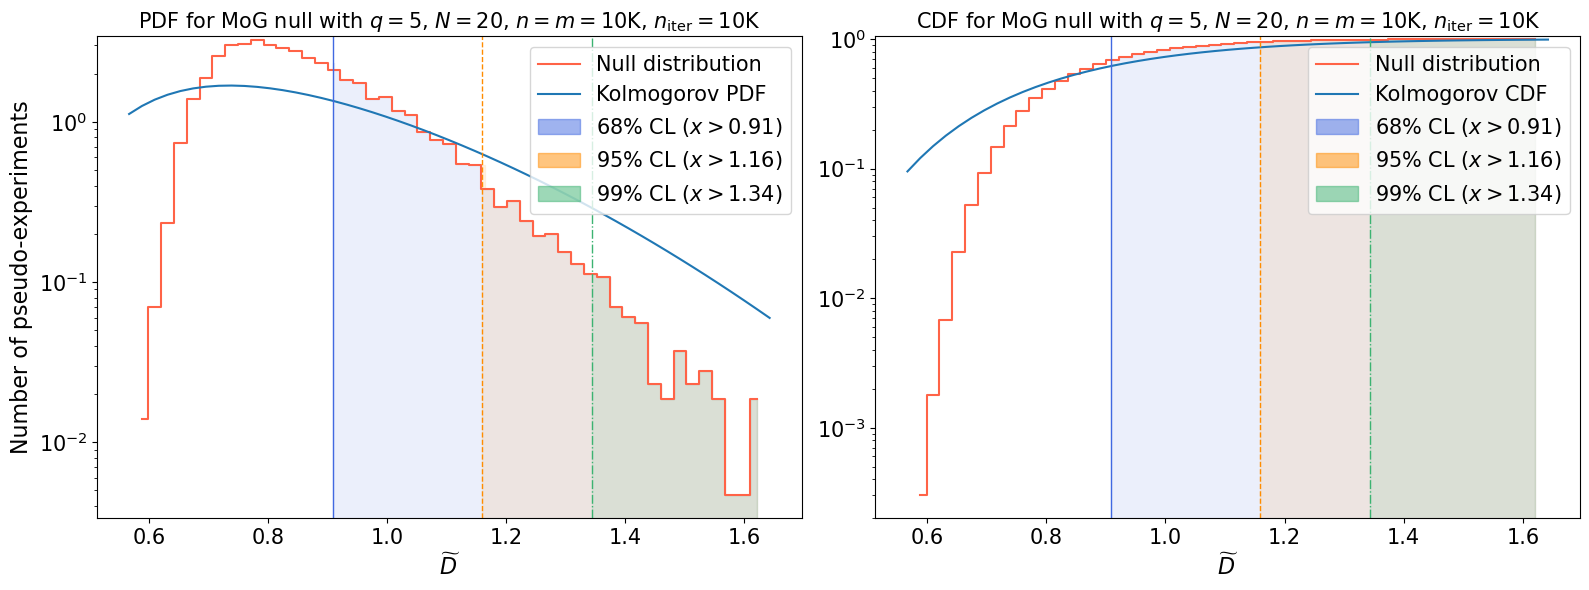

Time elapsed: 1.3018588690028992 seconds.
mu = 0.6303501041353103 +/- 0.0004144095234910916
sigma = 0.20357050952706573 +/- 0.001852256527705372


/tmp/ipykernel_15764/379088798.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_15764/379088798.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_15764/379088798.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_15764/379088798.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


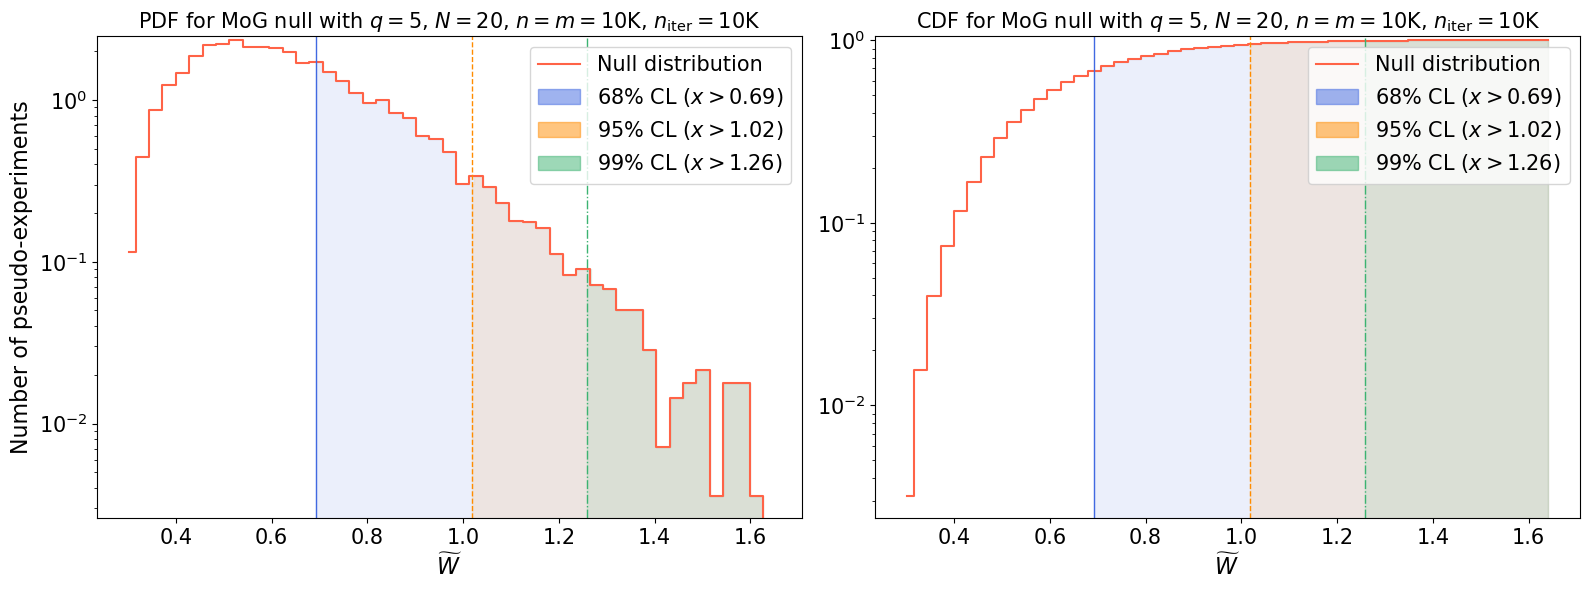

Time elapsed: 0.923096759011969 seconds.


name object_name          class_name                                kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                    {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                    {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                    {}   
3   ks      KSTest     GMetrics.KSTest                                    {}   
4  sks     SKSTest    GMetrics.SKSTest   {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric   {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric  {'null_test': True, 'verbose': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7fc0bd691240>   
1          metric_list  <function <lambda> at 0x7fc0bd693130>   
2          metric_list  <function <lambda> at 0x7fc0bd692170>   
3      statistic_means  <function <lambda> at 0x7fc0bd6931c0>   
4         metric_means  <function <lambda> at 0x7fc0bd693250>   
5         metric_means  <function <lambda> at 0x7fc0bd6932e0>   
6  lik_ratio_norm_list  <function <lambda> at 0x7fc0bd693370>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1               lambda ns, ndims: 1000   
2               lambda ns, ndims: 1000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 10000, 'ba...           1000   
1  {'niter': 10000, 'batch_size_test': 10000, 'ba...            200   
2  {'niter': 10000, 'batch_size_test': 10000, 'ba...             10   
3  {'niter': 10000, 'batch_size_test': 10000, 'ba...          10000   
4  {'niter': 10000, 'batch_size_test': 10000, 'ba...            200   
5  {'niter': 10000, 'batch_size_test': 10000, 'ba...            200   
6  {'niter': 10000, 'batch_size_test': 10000, 'ba...            200   

                        latex                                    null_file  \
0  $\overline{\|\cdot\|}_{F}$   ../results/20D_10K/null_hypothesis/FN.json   
1          $d_{\mathrm{FPD}}$  ../results/20D_10K/null_hypothesis/FPD.json   
2          $d_{\mathrm{KPD}}$  ../results/20D_10K/null_hypothesis/KPD.json   
3              $\overline{D}$   ../results/20D_10K/null_hypothesis/KS.json   
4             $\widetilde{D}$  ../results/20D_10K/null_hypothesis/SKS.json   
5             $\widetilde{W}$  ../results/20D_10K/null_hypothesis/SWD.json   
6                   $t_{\mu}$   ../results/20D_10K/null_hypothesis/LR.json   

                                          thresholds  \
0  [[0.68, [6800, 3199], 0.6792931553721728], [0....   
1  [[0.68, [6800, 3199], 0.6669445748113885], [0....   
2  [[0.68, [6800, 3199], 0.14945605649963056], [0...   
3  [[0.68, [6800, 3199], 0.9174711429984861], [0....   
4  [[0.68, [6800, 3199], 0.9090568803073205], [0....   
5  [[0.68, [6800, 3199], 0.6922491767525255], [0....   
6  [[0.005, mean, [[0.95, [9500, 500], -130.46193...   

                                  null_figure  
0   ../results/20D_10K/null_hypothesis/FN.pdf  
1  ../results/20D_10K/null_hypothesis/FPD.pdf  
2  ../results/20D_10K/null_hypothesis/KPD.pdf  
3   ../results/20D_10K/null_hypothesis/KS.pdf  
4  ../results/20D_10K/null_hypothesis/SKS.pdf  
5  ../results/20D_10K/null_hypothesis/SWD.pdf  
6                                         NaN

In [26]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    if "FPD" in latex:
        latex = r"$d_{\mathrm{FPD}}\,(\times 10^{3})$"
    elif "KPD" in latex:
        latex = r"$d_{\mathrm{KPD}}\,(\times 10^{3})$"
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [14]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [15]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [16]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 5.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fn with mean deformation already loaded.
Exclusion limits for fn with std deformation already loaded.
Exclusion limits for fn with both deformation already loaded.
Exclusion limits for fpd with mean deformation already loaded.
Exclusion limits for fpd with std deformation already loaded.
Exclusion limits for fpd with both deformation already loaded.
Exclusion limits for kpd with mean deformation already loaded.
Exclusion limits for kpd with std deformation already loaded.
Exclusion limits for kpd with both deformation already loaded.
Exclusion limits for ks with mean deformation already loaded.
Exclusion limits for ks with std deformation already loaded.
Exclusion limits for ks with both deformation already loaded.
Exclusion limits for sks with mean deformation already loaded.
Exclusion limits for sks with std deformation already loaded.
Exclusion limits for sks with both deformation already loaded.
Exclusion limits for swd with mean deformation already loaded.
Exc

### Likelihood-ratio test

In [17]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [18]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Computing exclusion limits for lr with mean deformation.

=============== lr - only mean ===============

------------ 1 ------------
eps = 0.005
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...


Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 10000
nchunks = 50
Iterating from 0 to 200 out of 10000 .
Iterating from 200 to 400 out of 10000 .
Iterating from 400 to 600 out of 10000 .
Iterating from 600 to 800 out of 10000 .
Iterating from 800 to 1000 out of 10000 .
Iterating from 1000 to 1200 out of 10000 .
Iterating from 1200 to 1400 out of 10000 .
Iterating from 1400 to 1600 out of 10000 .
Iterating from 1600 to 1800 out of 10000 .
Iterating from 1800 to 2000 out of 10000 .
Iterating from 2000 to 2200 out of 10000 .
Iterating from 2200 to 2400 out of 10000 .
Iterating from 2400 to 2600 out of 10000 .
Iterating from 2600 to 2800 out of 10000 .
Iterating from 2800 to 300

### Show and save results

In [19]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


In [20]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [21]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
18        lr        mean   20  10000                10000   
9         ks        mean   20  10000                10000   
0         fn        mean   20  10000                10000   
12       sks        mean   20  10000                10000   
3        fpd        mean   20  10000                10000   
15       swd        mean   20  10000                10000   
6        kpd        mean   20  10000                10000   

    $\epsilon^{\mu}_{95\%\mathrm{CL}}$  $\epsilon^{\mu}_{99\%\mathrm{CL}}$  \
18                             0.00058                             0.00080   
9                              0.01041                             0.01494   
0                              0.06439                             0.09241   
12                             0.07355                             0.10271   
3                              0.11566                             0.15680   
15                             0.12054                             0.17475   
6                              0.23743                             0.31533   

    $t^{\mu}$ (s)  
18           5447  
9            2148  
0            1678  
12           1887  
3            1694  
15           1791  
6            1588

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
18        lr                             0.00058   
9         ks                             0.01041   
0         fn                             0.06439   
12       sks                             0.07355   
3        fpd                             0.11566   
15       swd                             0.12054   
6        kpd                             0.23743   

    $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  
18                             0.00080           5447  
9                              0.01494           2148  
0                              0.09241           1678  
12                             0.10271           1887  
3                              0.15680           1694  
15                             0.17475           1791  
6                              0.31533           1588

In [22]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
19        lr         std   20  10000                10000   
10        ks         std   20  10000                10000   
13       sks         std   20  10000                10000   
4        fpd         std   20  10000                10000   
16       swd         std   20  10000                10000   
1         fn         std   20  10000                10000   
7        kpd         std   20  10000                10000   

    $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19                                0.00079   
10                                0.02693   
13                                0.22034   
4                                 0.35767   
16                                0.39185   
1                                 0.53955   
7                                 2.89551   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00110              5368  
10                                0.03922              1971  
13                                0.33353              1659  
4                                 0.47327              1427  
16                                0.58310              1658  
1                                 0.68983              1338  
7                                 3.34764              1136

Statistic  $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19        lr                                0.00079   
10        ks                                0.02693   
13       sks                                0.22034   
4        fpd                                0.35767   
16       swd                                0.39185   
1         fn                                0.53955   
7        kpd                                2.89551   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00110              5368  
10                                0.03922              1971  
13                                0.33353              1659  
4                                 0.47327              1427  
16                                0.58310              1658  
1                                 0.68983              1338  
7                                 3.34764              1136

In [23]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
20        lr        both   20  10000                10000   
11        ks        both   20  10000                10000   
2         fn        both   20  10000                10000   
14       sks        both   20  10000                10000   
5        fpd        both   20  10000                10000   
17       swd        both   20  10000                10000   
8        kpd        both   20  10000                10000   

    $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20                                    0.00049   
11                                    0.00973   
2                                     0.06378   
14                                    0.06744   
5                                     0.11017   
17                                    0.11139   
8                                     0.23743   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00065                  6230  
11                                    0.01403                  2170  
2                                     0.09180                  1773  
14                                    0.09484                  1853  
5                                     0.14897                  1642  
17                                    0.16211                  2036  
8                                     0.31533                  1598

Statistic  $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20        lr                                    0.00049   
11        ks                                    0.00973   
2         fn                                    0.06378   
14       sks                                    0.06744   
5        fpd                                    0.11017   
17       swd                                    0.11139   
8        kpd                                    0.23743   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00065                  6230  
11                                    0.01403                  2170  
2                                     0.09180                  1773  
14                                    0.09484                  1853  
5                                     0.14897                  1642  
17                                    0.16211                  2036  
8                                     0.31533                  1598

In [24]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
0          $t_{\mathrm{LLR}}$                             0.00058   
1              $\overline{D}$                             0.01041   
2  $\overline{\|\cdot\|}_{F}$                             0.06439   
3             $\widetilde{D}$                             0.07355   
4          $d_{\mathrm{FPD}}$                             0.11566   
5             $\widetilde{W}$                             0.12054   
6          $d_{\mathrm{KPD}}$                             0.23743   

   $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  \
0                             0.00080           5447   
1                             0.01494           2148   
2                             0.09241           1678   
3                             0.10271           1887   
4                             0.15680           1694   
5                             0.17475           1791   
6                             0.31533           1588   

   $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
0                                0.00079   
1                                0.02693   
2                                0.53955   
3                                0.22034   
4                                0.35767   
5                                0.39185   
6                                2.89551   

   $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  \
0                                0.00110              5368   
1                                0.03922              1971   
2                                0.68983              1338   
3                                0.33353              1659   
4                                0.47327              1427   
5                                0.58310              1658   
6                                3.34764              1136   

   $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
0                                    0.00049   
1                                    0.00973   
2                                    0.06378   
3                                    0.06744   
4                                    0.11017   
5                                    0.11139   
6                                    0.23743   

   $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  \
0                                    0.00065                  6230   
1                                    0.01403                  2170   
2                                    0.09180                  1773   
3                                    0.09484                  1853   
4                                    0.14897                  1642   
5                                    0.16211                  2036   
6                                    0.31533                  1598   

  $t^{\mathrm{null}}$ (s)  
0                       -  
1                     446  
2                      90  
3                    1125  
4                     512  
5                     692  
6                    2027

\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$t_{\mathrm{LLR}}$ & 0.00058 & 0.0008 & 5447 & 0.00079 & 0.0011 & 5368 & 0.00049 & 0.00065 & 6230 & - \\
$\overline{D}$ & 0.01 & 0.015 & 2148 & 0.027 & 0.039 & 1971 & 0.0097 & 0.014 & 2170 & 446 \\
$\overline{\|\cdot\|}_{F}$ & 0.064 & 0.092 & 1678 & 0.54 & 0.69 & 1338 & 0.064 & 0.092 & 1773 & 90 \\
$\widetilde{D}$ & 0.074 & 0.1 & 1887 & 0.22 & 0.33 & 1659 & 0.067 & 0.095 & 1853 & 1125 \\
$d_{\mathrm{FPD}}$ & 0.12 & 0.16 & 1694 & 0.36 & 0.47 & 1427 & 0.11 & 0.15 & 1642 & 512 \\
$\widetilde{W}$ & 0.12 & 0.17 & 1791 & 0.39 & 0.58 & 1658 & 0.11 & 0.16 & 2036 & 692 \\
$d_{\mathrm{KPD}}$ & 0.24 & 0.32 & 1588 

# Fixed $n=20000$

## Null hypotheses

### Model definition

In [2]:
seed = 0
ncomp = 5
ndims = 20
niter = 10_000
batch_size_test = 20_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (20,) (20,)


In [3]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [4]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 200000000
batch_size 20000
niter 10000
niter * batch_size 200000000
small_sample False


In [5]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               block_size = 10_000,
                               num_batches = 1,
                               batch_size = 20_000)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [6]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

niter  batch_size_test  batch_size_gen  small_sample_threshold dtype_input  \
0  10000            20000           10000                10000000     float64   

   seed  use_tf  mirror_strategy strategy  verbose  ...  ndims_1  nsamples_1  \
0     0    True            False     None     True  ...       20           0   

   is_symb_2  ndims_2  nsamples_2    dtype ndims   nsamples  small_sample  \
0       True       20           0  float64    20  200000000         False   

   ncomp  
0      5  

[1 rows x 21 columns]

In [7]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1000,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 1000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 20000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 20,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 20,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 20,
   'nsamples': 200000000,
   'small_sample': False,
   'ncomp': 5},
  'max_vectorize': 500,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results/20D_20K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_key': 'm

### Evaluate null hypotheses

In [8]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from ../results/20D_20K/null_hypothesis/FN.json
Loading fpd from ../results/20D_20K/null_hypothesis/FPD.json
Loading kpd from ../results/20D_20K/null_hypothesis/KPD.json
Loading ks from ../results/20D_20K/null_hypothesis/KS.json
Loading sks from ../results/20D_20K/null_hypothesis/SKS.json
Loading swd from ../results/20D_20K/null_hypothesis/SWD.json


In [9]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.6788822979764673], [0.95, [9500, 500], 0.9596082587975454], [0.99, [9900, 100], 1.1573383258716976]]
Computing time for metric fn: 109.01066207297845
ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.3361106497825677], [0.95, [9500, 500], 0.6755020255876569], [0.99, [9900, 100], 0.9519145844581727]]
Computing time for metric fpd: 871.6603192719922
ThresholdS for metric kpd: [[0.68, [6800, 3199], 0.7712382528390904], [0.95, [9500, 500], 2.7754338421925873], [0.99, [9900, 100], 4.63289006310541]]
Computing time for metric kpd: 26505.54451733001
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9160003066062927], [0.95, [9500, 500], 1.1809997260570526], [0.99, [9900, 100], 1.3612501323223114]]
Computing time for metric ks: 210.51983290701173
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9153506718575954], [0.95, [9500, 500], 1.1692005209624767], [0.99, [9900, 100], 1.322800386697054]]
Computing time for metric sks: 1055.9388479799964

name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f44f8e24dc0>   
1          metric_list  <function <lambda> at 0x7f44f904dc60>   
2          metric_list  <function <lambda> at 0x7f44f904dd80>   
3      statistic_means  <function <lambda> at 0x7f44f904de10>   
4         metric_means  <function <lambda> at 0x7f44f904dea0>   
5         metric_means  <function <lambda> at 0x7f44f904df30>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f44f904dfc0>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1               lambda ns, ndims: 1000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 20000, 'ba...            500   
1  {'niter': 10000, 'batch_size_test': 20000, 'ba...            100   
2  {'niter': 10000, 'batch_size_test': 20000, 'ba...              1   
3  {'niter': 10000, 'batch_size_test': 20000, 'ba...          10000   
4  {'niter': 10000, 'batch_size_test': 20000, 'ba...            200   
5  {'niter': 10000, 'batch_size_test': 20000, 'ba...            200   
6  {'niter': 10000, 'batch_size_test': 20000, 'ba...            200   

                        latex                                    null_file  \
0  $\overline{\|\cdot\|}_{F}$   ../results/20D_20K/null_hypothesis/FN.json   
1          $d_{\mathrm{FPD}}$  ../results/20D_20K/null_hypothesis/FPD.json   
2          $d_{\mathrm{KPD}}$  ../results/20D_20K/null_hypothesis/KPD.json   
3              $\overline{D}$   ../results/20D_20K/null_hypothesis/KS.json   
4             $\widetilde{D}$  ../results/20D_20K/null_hypothesis/SKS.json   
5             $\widetilde{W}$  ../results/20D_20K/null_hypothesis/SWD.json   
6                   $t_{\mu}$   ../results/20D_20K/null_hypothesis/LR.json   

                                          thresholds  
0  [[0.68, [6800, 3199], 0.6788822979764673], [0....  
1  [[0.68, [6800, 3199], 0.3361106497825677], [0....  
2  [[0.68, [6800, 3199], 0.7712382528390904], [0....  
3  [[0.68, [6800, 3199], 0.9160003066062927], [0....  
4  [[0.68, [6800, 3199], 0.9153506718575954], [0....  
5  [[0.68, [6800, 3199], 0.6985687818507677], [0....  
6                                                 []

### Plots of null-distributions

mu = 0.6105766343607638 +/- 0.00036319561359344105
sigma = 0.1905769171734712 +/- 0.0015921697403870976


/tmp/ipykernel_36420/2428069334.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_36420/2428069334.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_36420/2428069334.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_36420/2428069334.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


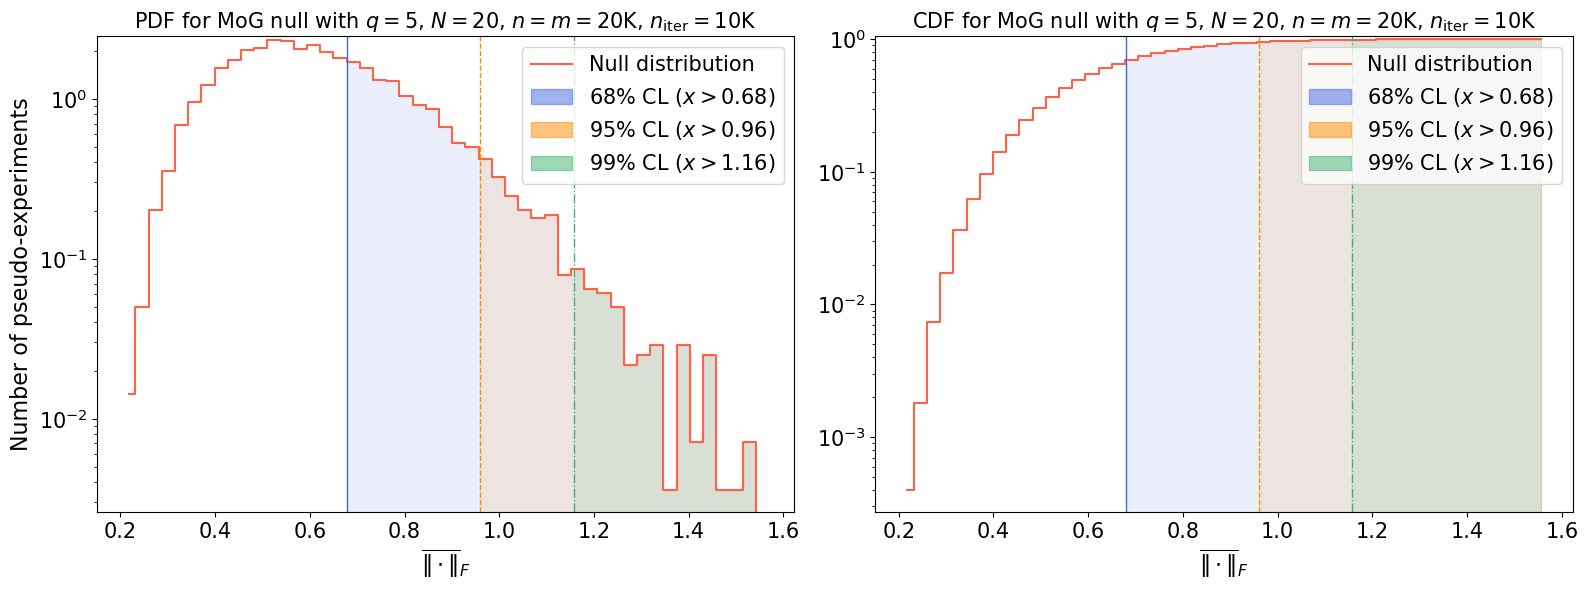

Time elapsed: 2.6477870369853918 seconds.
mu = 0.29772832367758856 +/- 0.0003901638400420705
sigma = 0.19752565404070188 +/- 0.002489033074693117


/tmp/ipykernel_36420/2428069334.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_36420/2428069334.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_36420/2428069334.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_36420/2428069334.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


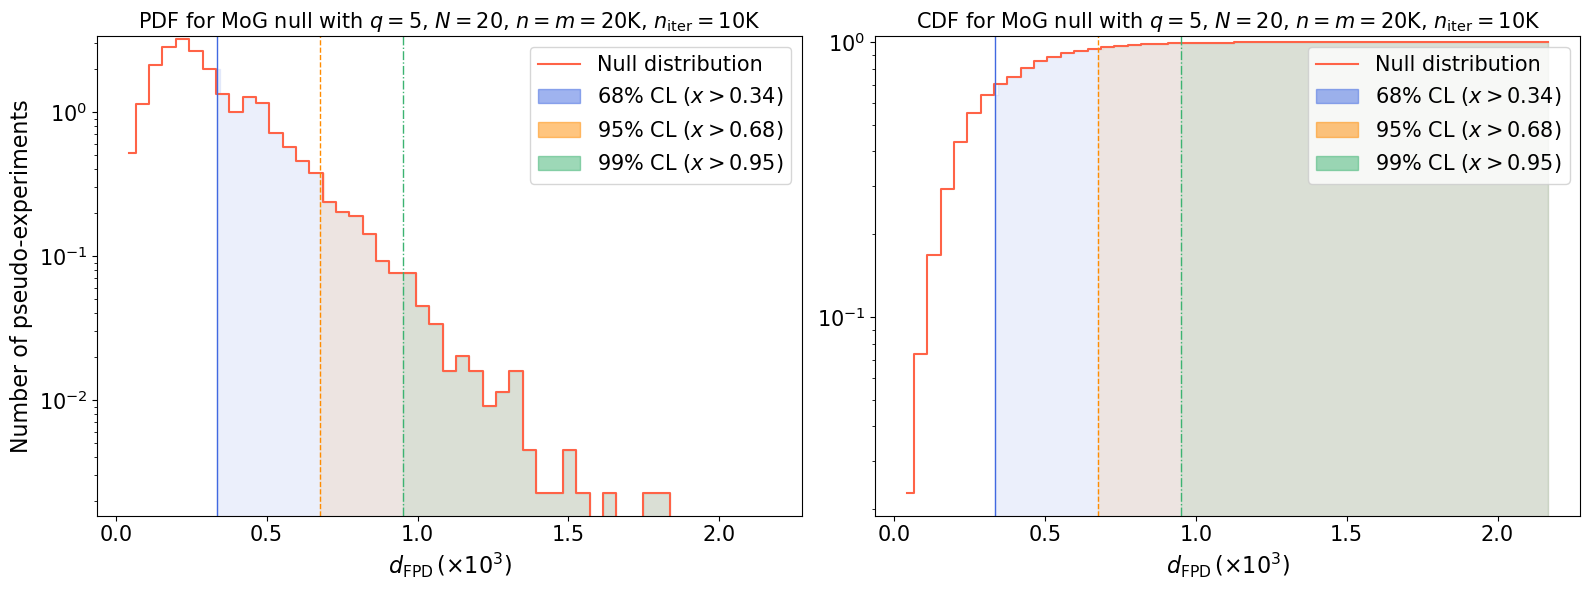

Time elapsed: 1.2353588239930104 seconds.
mu = 0.5860023996935327 +/- 0.012619835678145779
sigma = 1.1233804198999455 +/- 0.015790258185303187


/tmp/ipykernel_36420/2428069334.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_36420/2428069334.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_36420/2428069334.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_36420/2428069334.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


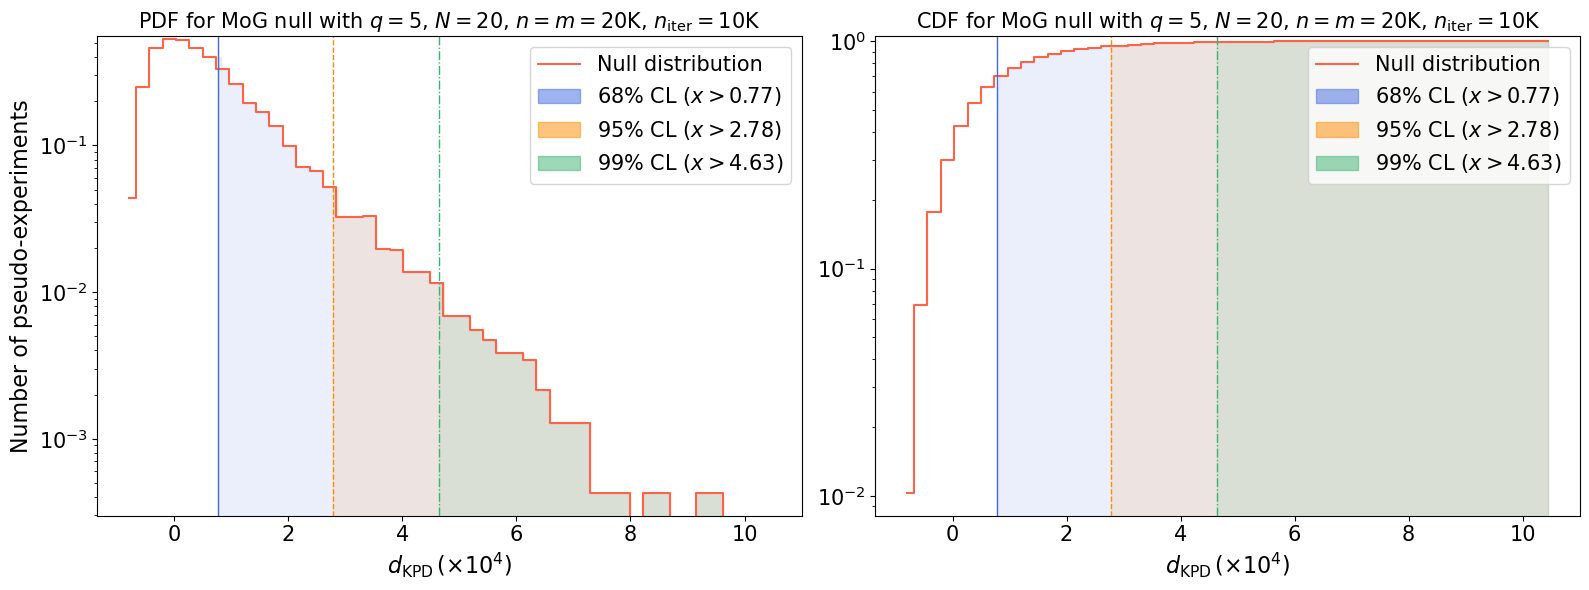

Time elapsed: 1.2741318420157768 seconds.
mu = 0.8676504112402909 +/- 0.0002670829914570393
sigma = 0.1634267393840553 +/- 0.0014414033283205322


/tmp/ipykernel_36420/2428069334.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_36420/2428069334.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_36420/2428069334.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_36420/2428069334.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


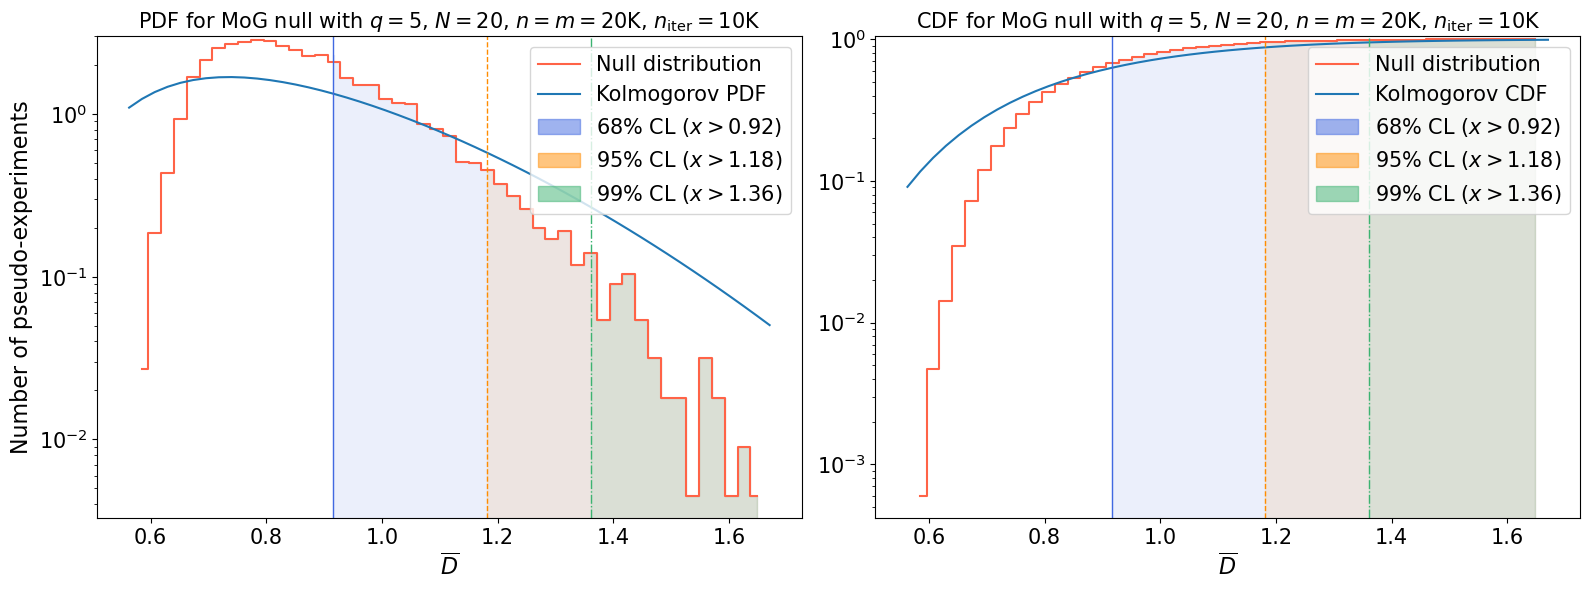

Time elapsed: 1.7474940819956828 seconds.
mu = 0.8685079028550535 +/- 0.00023901411358594565
sigma = 0.15460081292992792 +/- 0.0013969523515819566


/tmp/ipykernel_36420/2428069334.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_36420/2428069334.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_36420/2428069334.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_36420/2428069334.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


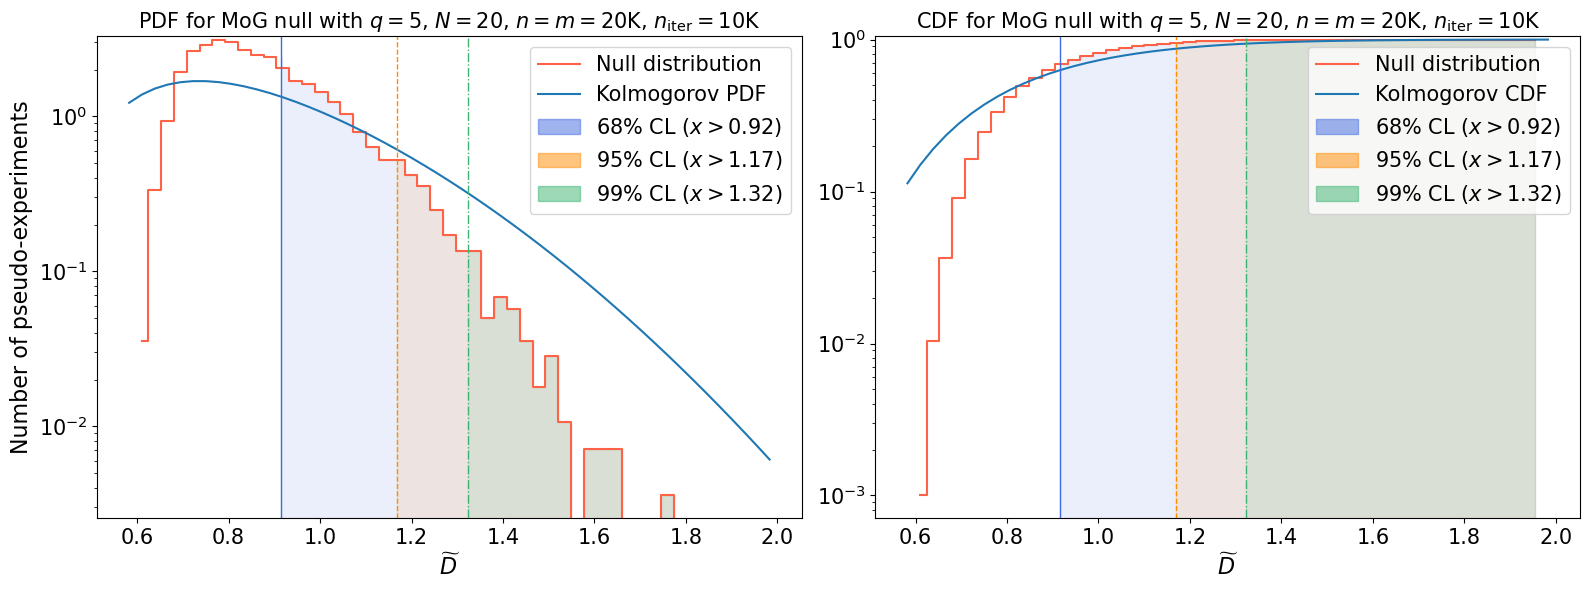

Time elapsed: 1.7573887910111807 seconds.
mu = 0.6336574280563445 +/- 0.0004205254021025563
sigma = 0.20506716024331062 +/- 0.0017755542413807892


/tmp/ipykernel_36420/2428069334.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_36420/2428069334.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_36420/2428069334.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_36420/2428069334.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


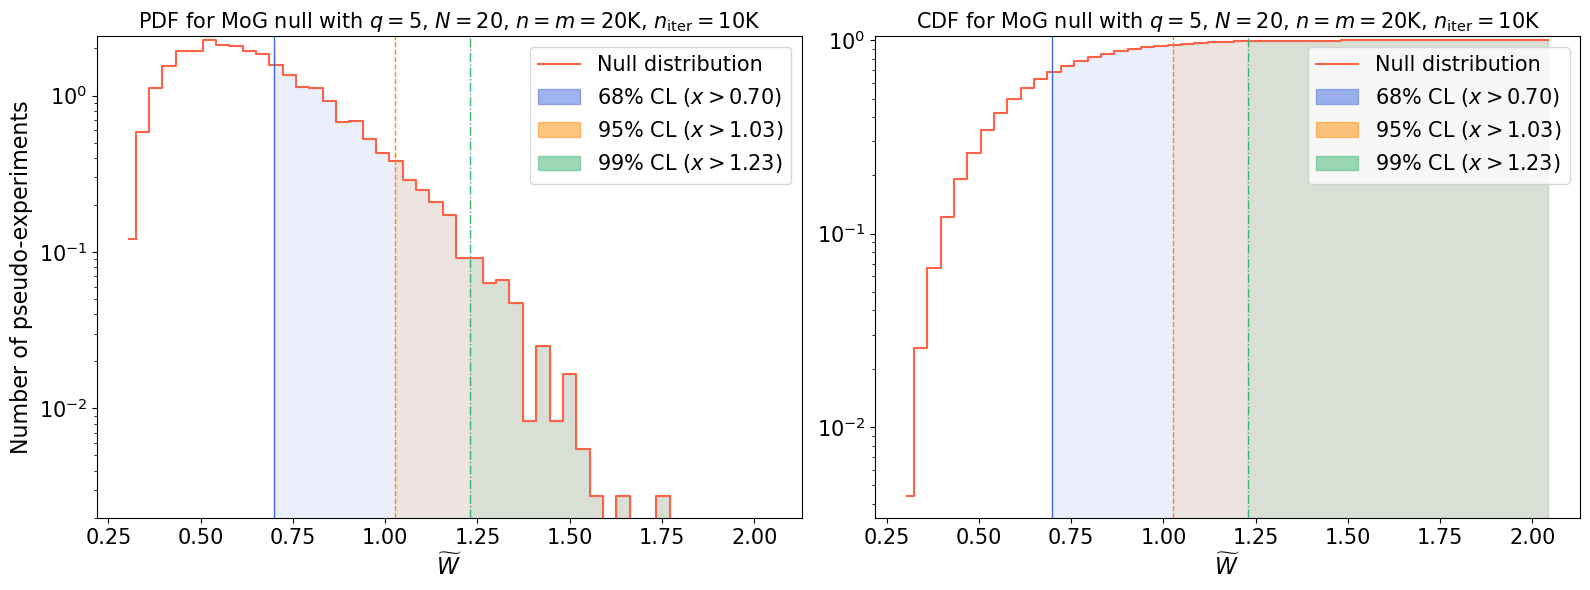

Time elapsed: 0.9281035460007843 seconds.


name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f11ab3dc790>   
1          metric_list  <function <lambda> at 0x7f11ab3dcca0>   
2          metric_list  <function <lambda> at 0x7f11ab3ddcf0>   
3      statistic_means  <function <lambda> at 0x7f11ab3ddd80>   
4         metric_means  <function <lambda> at 0x7f11ab3dde10>   
5         metric_means  <function <lambda> at 0x7f11ab3ddea0>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f11ab3ddf30>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1               lambda ns, ndims: 1000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 20000, 'ba...            500   
1  {'niter': 10000, 'batch_size_test': 20000, 'ba...            100   
2  {'niter': 10000, 'batch_size_test': 20000, 'ba...              1   
3  {'niter': 10000, 'batch_size_test': 20000, 'ba...          10000   
4  {'niter': 10000, 'batch_size_test': 20000, 'ba...            200   
5  {'niter': 10000, 'batch_size_test': 20000, 'ba...            200   
6  {'niter': 10000, 'batch_size_test': 20000, 'ba...            200   

                        latex                                    null_file  \
0  $\overline{\|\cdot\|}_{F}$   ../results/20D_20K/null_hypothesis/FN.json   
1          $d_{\mathrm{FPD}}$  ../results/20D_20K/null_hypothesis/FPD.json   
2          $d_{\mathrm{KPD}}$  ../results/20D_20K/null_hypothesis/KPD.json   
3              $\overline{D}$   ../results/20D_20K/null_hypothesis/KS.json   
4             $\widetilde{D}$  ../results/20D_20K/null_hypothesis/SKS.json   
5             $\widetilde{W}$  ../results/20D_20K/null_hypothesis/SWD.json   
6                   $t_{\mu}$   ../results/20D_20K/null_hypothesis/LR.json   

                                          thresholds  \
0  [[0.68, [6800, 3199], 0.6788822979764673], [0....   
1  [[0.68, [6800, 3199], 0.3361106497825677], [0....   
2  [[0.68, [6800, 3199], 0.7712382528390904], [0....   
3  [[0.68, [6800, 3199], 0.9160003066062927], [0....   
4  [[0.68, [6800, 3199], 0.9153506718575954], [0....   
5  [[0.68, [6800, 3199], 0.6985687818507677], [0....   
6                                                 []   

                                  null_figure  
0   ../results/20D_20K/null_hypothesis/FN.pdf  
1  ../results/20D_20K/null_hypothesis/FPD.pdf  
2  ../results/20D_20K/null_hypothesis/KPD.pdf  
3   ../results/20D_20K/null_hypothesis/KS.pdf  
4  ../results/20D_20K/null_hypothesis/SKS.pdf  
5  ../results/20D_20K/null_hypothesis/SWD.pdf  
6                                         NaN

In [10]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    if "FPD" in latex:
        latex = r"$d_{\mathrm{FPD}}\,(\times 10^{3})$"
    elif "KPD" in latex:
        latex = r"$d_{\mathrm{KPD}}\,(\times 10^{4})$"
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [10]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [11]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [12]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 5.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fn with mean deformation already loaded.
Exclusion limits for fn with std deformation already loaded.
Exclusion limits for fn with both deformation already loaded.
Exclusion limits for fpd with mean deformation already loaded.
Exclusion limits for fpd with std deformation already loaded.
Exclusion limits for fpd with both deformation already loaded.
Exclusion limits for kpd with mean deformation already loaded.
Exclusion limits for kpd with std deformation already loaded.
Exclusion limits for kpd with both deformation already loaded.
Exclusion limits for ks with mean deformation already loaded.
Exclusion limits for ks with std deformation already loaded.
Exclusion limits for ks with both deformation already loaded.
Exclusion limits for sks with mean deformation already loaded.
Exclusion limits for sks with std deformation already loaded.
Exclusion limits for sks with both deformation already loaded.
Exclusion limits for swd with mean deformation already loaded.
Exc

### Likelihood-ratio test

In [13]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [14]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Exclusion limits for LR with mean deformation already loaded.
Computing exclusion limits for lr with std deformation.

=============== lr - only std ===============

------------ 1 ------------
eps = 0.005
Computing null distribution
Parsing input distribution...


Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 20000
nchunks = 50
Iterating from 0 to 200 out of 10000 .
Iterating from 200 to 400 out of 10000 .
Iterating from 400 to 600 out of 10000 .
Iterating from 600 to 800 out of 10000 .
Iterating from 800 to 1000 out of 10000 .
Iterating from 1000 to 1200 out of 10000 .
Iterating from 1200 to 1400 out of 10000 .
Iterating from 1400 to 1600 out of 10000 .
Iterating from 1600 to 1800 out of 10000 .
Iterating from 1800 to 2000 out of 10000 .
Iterating from 2000 to 2200 out of 10000 .
Iterating from 2200 to 2400 out of 10000 .
Iterating from 2400

### Show and save results

In [15]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


In [16]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [17]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
18        lr        mean   20  10000                20000   
9         ks        mean   20  10000                20000   
0         fn        mean   20  10000                20000   
12       sks        mean   20  10000                20000   
3        fpd        mean   20  10000                20000   
15       swd        mean   20  10000                20000   
6        kpd        mean   20  10000                20000   

    $\epsilon^{\mu}_{95\%\mathrm{CL}}$  $\epsilon^{\mu}_{99\%\mathrm{CL}}$  \
18                             0.00036                             0.00051   
9                              0.00757                             0.01066   
0                              0.04288                             0.06315   
12                             0.05508                             0.07229   
3                              0.07782                             0.10516   
15                             0.09369                             0.12543   
6                              0.14099                             0.20802   

    $t^{\mu}$ (s)  
18           6297  
9            2730  
0            1719  
12           1881  
3            1786  
15           1833  
6            2132

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
18        lr                             0.00036   
9         ks                             0.00757   
0         fn                             0.04288   
12       sks                             0.05508   
3        fpd                             0.07782   
15       swd                             0.09369   
6        kpd                             0.14099   

    $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  
18                             0.00051           6297  
9                              0.01066           2730  
0                              0.06315           1719  
12                             0.07229           1881  
3                              0.10516           1786  
15                             0.12543           1833  
6                              0.20802           2132

In [18]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
19        lr         std   20  10000                20000   
10        ks         std   20  10000                20000   
13       sks         std   20  10000                20000   
4        fpd         std   20  10000                20000   
16       swd         std   20  10000                20000   
1         fn         std   20  10000                20000   
7        kpd         std   20  10000                20000   

    $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19                                0.00052   
10                                0.01808   
13                                0.16296   
4                                 0.24353   
16                                0.29175   
1                                 0.40405   
7                                 2.17773   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00072              5345  
10                                0.02637              2480  
13                                0.22614              1752  
4                                 0.32830              1612  
16                                0.40555              1595  
1                                 0.55441              1312  
7                                 2.67384              1408

Statistic  $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19        lr                                0.00052   
10        ks                                0.01808   
13       sks                                0.16296   
4        fpd                                0.24353   
16       swd                                0.29175   
1         fn                                0.40405   
7        kpd                                2.17773   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00072              5345  
10                                0.02637              2480  
13                                0.22614              1752  
4                                 0.32830              1612  
16                                0.40555              1595  
1                                 0.55441              1312  
7                                 2.67384              1408

In [19]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
20        lr        both   20  10000                20000   
11        ks        both   20  10000                20000   
2         fn        both   20  10000                20000   
14       sks        both   20  10000                20000   
5        fpd        both   20  10000                20000   
17       swd        both   20  10000                20000   
8        kpd        both   20  10000                20000   

    $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20                                    0.00030   
11                                    0.00689   
2                                     0.04196   
14                                    0.05112   
5                                     0.07477   
17                                    0.08636   
8                                     0.14099   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00042                  6389  
11                                    0.00967                  2511  
2                                     0.06224                  1690  
14                                    0.06713                  1987  
5                                     0.10032                  2308  
17                                    0.11606                  1888  
8                                     0.20802                  2279

Statistic  $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20        lr                                    0.00030   
11        ks                                    0.00689   
2         fn                                    0.04196   
14       sks                                    0.05112   
5        fpd                                    0.07477   
17       swd                                    0.08636   
8        kpd                                    0.14099   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00042                  6389  
11                                    0.00967                  2511  
2                                     0.06224                  1690  
14                                    0.06713                  1987  
5                                     0.10032                  2308  
17                                    0.11606                  1888  
8                                     0.20802                  2279

In [20]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
0          $t_{\mathrm{LLR}}$                             0.00036   
1              $\overline{D}$                             0.00757   
2  $\overline{\|\cdot\|}_{F}$                             0.04288   
3             $\widetilde{D}$                             0.05508   
4          $d_{\mathrm{FPD}}$                             0.07782   
5             $\widetilde{W}$                             0.09369   
6          $d_{\mathrm{KPD}}$                             0.14099   

   $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  \
0                             0.00051           6297   
1                             0.01066           2730   
2                             0.06315           1719   
3                             0.07229           1881   
4                             0.10516           1786   
5                             0.12543           1833   
6                             0.20802           2132   

   $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
0                                0.00052   
1                                0.01808   
2                                0.40405   
3                                0.16296   
4                                0.24353   
5                                0.29175   
6                                2.17773   

   $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  \
0                                0.00072              5345   
1                                0.02637              2480   
2                                0.55441              1312   
3                                0.22614              1752   
4                                0.32830              1612   
5                                0.40555              1595   
6                                2.67384              1408   

   $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
0                                    0.00030   
1                                    0.00689   
2                                    0.04196   
3                                    0.05112   
4                                    0.07477   
5                                    0.08636   
6                                    0.14099   

   $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  \
0                                    0.00042                  6389   
1                                    0.00967                  2511   
2                                    0.06224                  1690   
3                                    0.06713                  1987   
4                                    0.10032                  2308   
5                                    0.11606                  1888   
6                                    0.20802                  2279   

  $t^{\mathrm{null}}$ (s)  
0                       -  
1                     210  
2                     109  
3                    1055  
4                     871  
5                     718  
6                   26505

\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$t_{\mathrm{LLR}}$ & 0.00036 & 0.00051 & 6297 & 0.00052 & 0.00072 & 5345 & 0.0003 & 0.00042 & 6389 & - \\
$\overline{D}$ & 0.0076 & 0.011 & 2730 & 0.018 & 0.026 & 2480 & 0.0069 & 0.0097 & 2511 & 210 \\
$\overline{\|\cdot\|}_{F}$ & 0.043 & 0.063 & 1719 & 0.4 & 0.55 & 1312 & 0.042 & 0.062 & 1690 & 109 \\
$\widetilde{D}$ & 0.055 & 0.072 & 1881 & 0.16 & 0.23 & 1752 & 0.051 & 0.067 & 1987 & 1055 \\
$d_{\mathrm{FPD}}$ & 0.078 & 0.11 & 1786 & 0.24 & 0.33 & 1612 & 0.075 & 0.1 & 2308 & 871 \\
$\widetilde{W}$ & 0.094 & 0.13 & 1833 & 0.29 & 0.41 & 1595 & 0.086 & 0.12 & 1888 & 718 \\
$d_{\mathrm{KPD}}$ & 0.14 & 0.2

# Fixed $n=50000$

## Null hypotheses

### Model definition

In [ ]:
seed = 0
ncomp = 5
ndims = 20
niter = 10_000
batch_size_test = 50_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (20,) (20,)


In [ ]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [ ]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 500000000
batch_size 50000
niter 10000
niter * batch_size 500000000
small_sample False


In [ ]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               block_size = 10_000,
                               num_batches = 1,
                               batch_size = 50_000)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [ ]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

niter  batch_size_test  batch_size_gen  small_sample_threshold dtype_input  \
0  10000            50000           10000                10000000     float64   

   seed  use_tf  mirror_strategy strategy  verbose  ...  ndims_1  nsamples_1  \
0     0    True            False     None     True  ...       20           0   

   is_symb_2  ndims_2  nsamples_2    dtype ndims   nsamples  small_sample  \
0       True       20           0  float64    20  500000000         False   

   ncomp  
0      5  

[1 rows x 21 columns]

In [ ]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1000,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 1000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 5000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 50000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 20,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 20,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 20,
   'nsamples': 500000000,
   'small_sample': False,
   'ncomp': 5},
  'max_vectorize': 200,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results_leonardo/20D_50K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result

### Evaluate null hypotheses

In [ ]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from ../results_leonardo/20D_50K/null_hypothesis/FN.json
Loading fpd from ../results_leonardo/20D_50K/null_hypothesis/FPD.json
Computing and savng kpd with max_vectorize = 1

------------------------------------------
Starting KPD metric calculation...
Running TF KPD calculation...
niter = 10000
batch_size = 50000


The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 10000
Iterating from 0 to 1 out of 10000 .


I0000 00:00:1712848602.531618 2598324 service.cc:145] XLA service 0xb9dc9170 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712848602.531670 2598324 service.cc:153]   StreamExecutor device (0): NVIDIA A100-SXM-64GB, Compute Capability 8.0
W0000 00:00:1712848602.627489 2598324 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_1/Assert/Assert
W0000 00:00:1712848602.632692 2598324 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_3/Assert/Assert
W0000 00:00:1712848602.636313 2598324 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_5/Assert/Assert
W0000 00:00:1712848602.636640 2598324 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_7/Assert/Assert
W0000 00:00:1712848602.637554 2598324 assert_op.cc:38] Ignoring Assert operator while/M

Computing (Tensor("while/Placeholder:0", shape=(), dtype=int32),Tensor("while/while/Placeholder:0", shape=(), dtype=int32)) component
Iterating from 1 to 2 out of 10000 .
Iterating from 2 to 3 out of 10000 .
Iterating from 3 to 4 out of 10000 .
Iterating from 4 to 5 out of 10000 .
Iterating from 5 to 6 out of 10000 .
Iterating from 6 to 7 out of 10000 .
Iterating from 7 to 8 out of 10000 .
Iterating from 8 to 9 out of 10000 .
Iterating from 9 to 10 out of 10000 .
Iterating from 10 to 11 out of 10000 .
Iterating from 11 to 12 out of 10000 .
Iterating from 12 to 13 out of 10000 .
Iterating from 13 to 14 out of 10000 .
Iterating from 14 to 15 out of 10000 .
Iterating from 15 to 16 out of 10000 .
Iterating from 16 to 17 out of 10000 .
Iterating from 17 to 18 out of 10000 .
Iterating from 18 to 19 out of 10000 .
Iterating from 19 to 20 out of 10000 .
Iterating from 20 to 21 out of 10000 .
Iterating from 21 to 22 out of 10000 .
Iterating from 22 to 23 out of 10000 .
Iterating from 23 to 24 o

In [ ]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.6785144811910258], [0.95, [9500, 500], 0.966201426908678], [0.99, [9900, 100], 1.157897800697627]]
Computing time for metric fn: 57.71853160299361
ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.30998923839973586], [0.95, [9500, 500], 0.40164100626660354], [0.99, [9900, 100], 0.5082638039985077]]
Computing time for metric fpd: 308.572451219894
ThresholdS for metric kpd: [[0.68, [6800, 3199], -0.012572873258065442], [0.95, [9500, 500], 0.01909257533796449], [0.99, [9900, 100], 0.043113464419874965]]
Computing time for metric kpd: 21299.58738276083
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9195917501004521], [0.95, [9500, 500], 1.1755778891604751], [0.99, [9900, 100], 1.3447591915257378]]
Computing time for metric ks: 180.53224830329418
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9118751448364196], [0.95, [9500, 500], 1.1608093289295256], [0.99, [9900, 100], 1.3268295075957064]]
Computing time for metric sks: 588.8191632

name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f2fd1ce27a0>   
1          metric_list  <function <lambda> at 0x7f2fd1ce2840>   
2          metric_list  <function <lambda> at 0x7f2fd1ce3ec0>   
3      statistic_means  <function <lambda> at 0x7f2fd1ce3f60>   
4         metric_means  <function <lambda> at 0x7f2fd00d0040>   
5         metric_means  <function <lambda> at 0x7f2fd00d00e0>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f2fd00d0180>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1               lambda ns, ndims: 1000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 50000, 'ba...            200   
1  {'niter': 10000, 'batch_size_test': 50000, 'ba...             50   
2  {'niter': 10000, 'batch_size_test': 50000, 'ba...              1   
3  {'niter': 10000, 'batch_size_test': 50000, 'ba...           5000   
4  {'niter': 10000, 'batch_size_test': 50000, 'ba...            100   
5  {'niter': 10000, 'batch_size_test': 50000, 'ba...            100   
6  {'niter': 10000, 'batch_size_test': 50000, 'ba...            100   

                        latex  \
0  $\overline{\|\cdot\|}_{F}$   
1          $d_{\mathrm{FPD}}$   
2          $d_{\mathrm{KPD}}$   
3              $\overline{D}$   
4             $\widetilde{D}$   
5             $\widetilde{W}$   
6                   $t_{\mu}$   

                                           null_file  \
0  ../results_leonardo/20D_50K/null_hypothesis/FN...   
1  ../results_leonardo/20D_50K/null_hypothesis/FP...   
2  ../results_leonardo/20D_50K/null_hypothesis/KP...   
3  ../results_leonardo/20D_50K/null_hypothesis/KS...   
4  ../results_leonardo/20D_50K/null_hypothesis/SK...   
5  ../results_leonardo/20D_50K/null_hypothesis/SW...   
6  ../results_leonardo/20D_50K/null_hypothesis/LR...   

                                          thresholds  
0  [[0.68, [6800, 3199], 0.6785144811910258], [0....  
1  [[0.68, [6800, 3199], 0.30998923839973586], [0...  
2  [[0.68, [6800, 3199], -0.012572873258065442], ...  
3  [[0.68, [6800, 3199], 0.9195917501004521], [0....  
4  [[0.68, [6800, 3199], 0.9118751448364196], [0....  
5  [[0.68, [6800, 3199], 0.6926097825260524], [0....  
6                                                 []

### Plots of null-distributions

mu = 0.6101349610302593 +/- 0.00036348882715102446
sigma = 0.1906538295316998 +/- 0.0016208903203650952


/tmp/ipykernel_2598324/1904285626.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2598324/1904285626.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2598324/1904285626.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2598324/1904285626.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


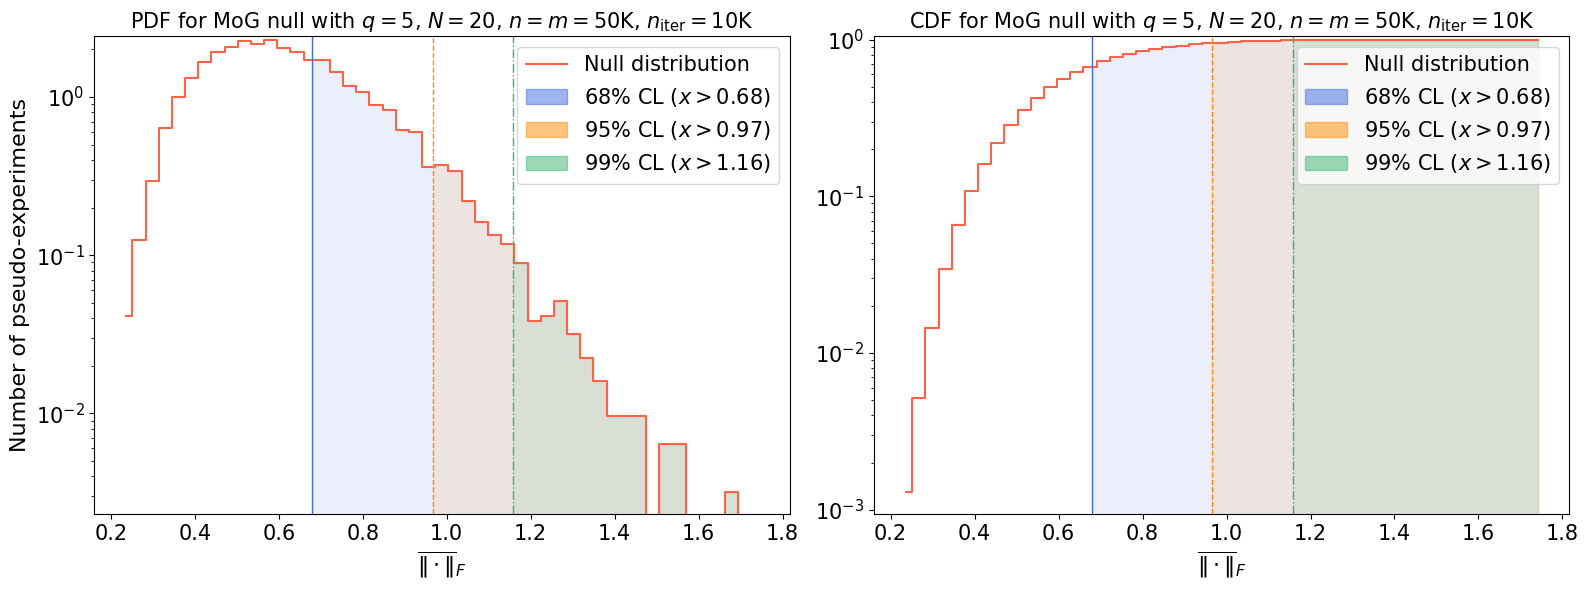

Time elapsed: 3.2810480454936624 seconds.
mu = 0.2797751569484641 +/- 6.15960437450416e-05
sigma = 0.07848314707314023 +/- 0.0008398878083077868


/tmp/ipykernel_2598324/1904285626.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2598324/1904285626.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2598324/1904285626.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2598324/1904285626.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


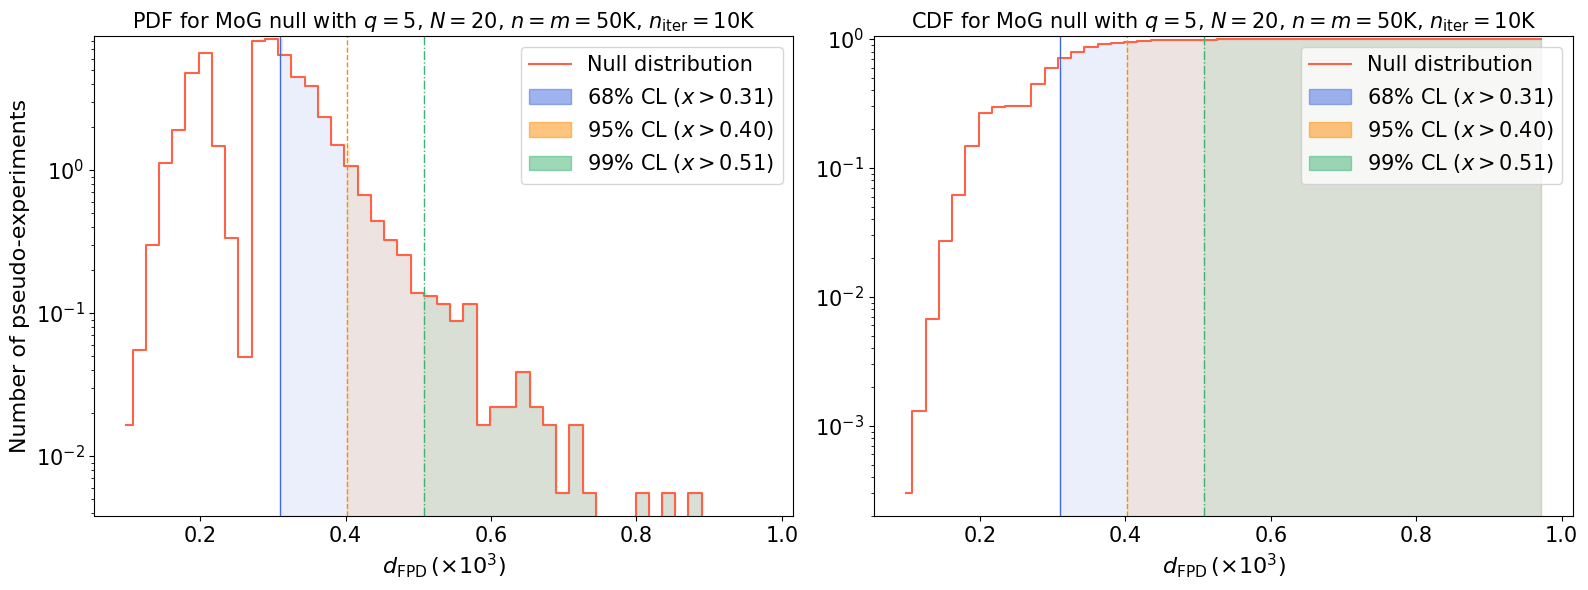

Time elapsed: 1.017607112415135 seconds.
mu = -0.02051214160040187 +/- 4.889542827298688e-06
sigma = 0.022112310660124798 +/- 0.0001900716105991554


/tmp/ipykernel_2598324/1904285626.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2598324/1904285626.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2598324/1904285626.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2598324/1904285626.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


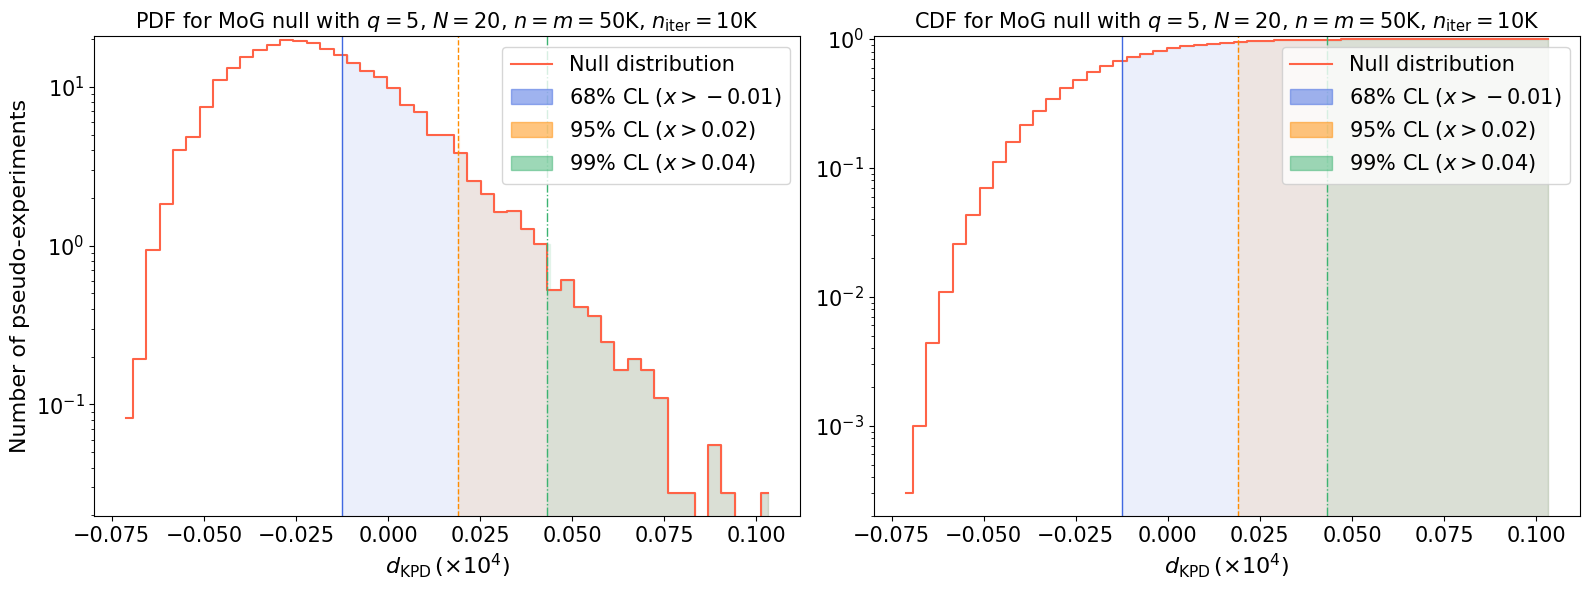

Time elapsed: 1.0461311414837837 seconds.
mu = 0.8668370228706197 +/- 0.00025895465438036184
sigma = 0.16092068057908587 +/- 0.001405116942830179


/tmp/ipykernel_2598324/1904285626.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2598324/1904285626.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2598324/1904285626.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2598324/1904285626.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


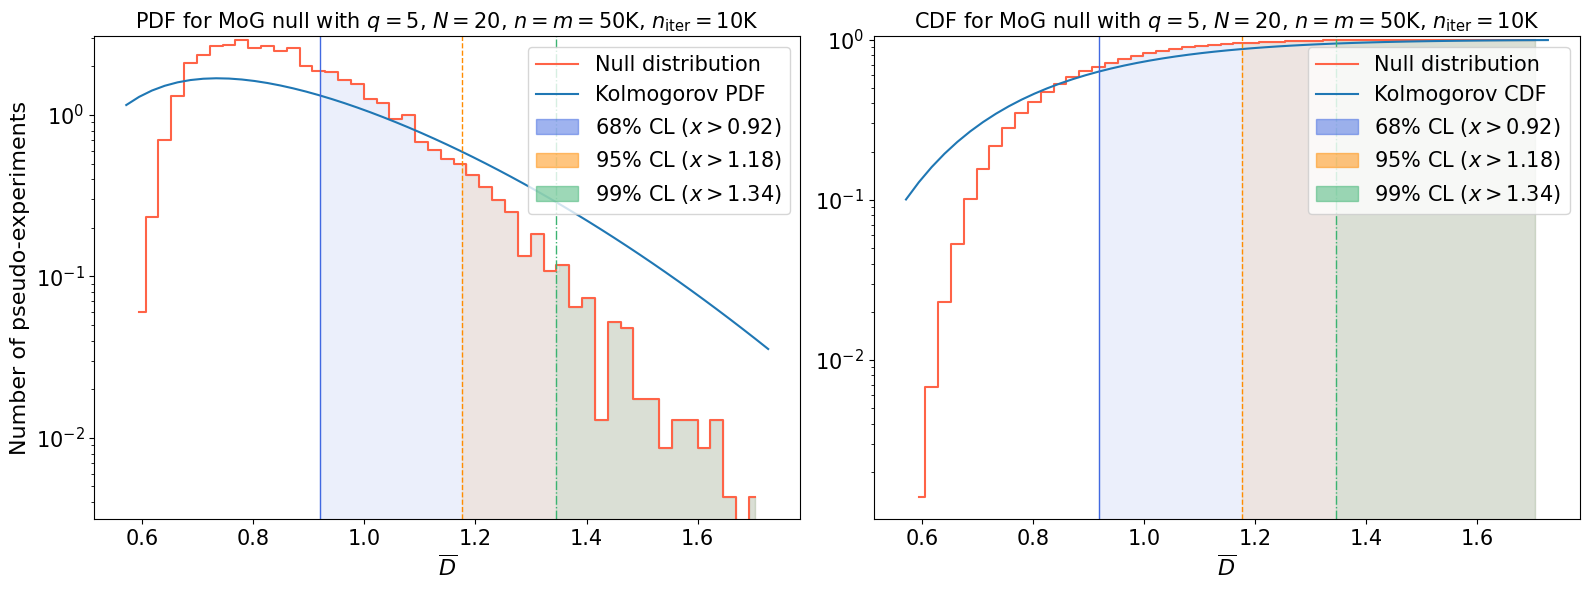

Time elapsed: 1.2824251940473914 seconds.
mu = 0.865353462100772 +/- 0.0002327056819423629
sigma = 0.15254693767570782 +/- 0.0014016555861021656


/tmp/ipykernel_2598324/1904285626.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2598324/1904285626.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2598324/1904285626.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2598324/1904285626.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


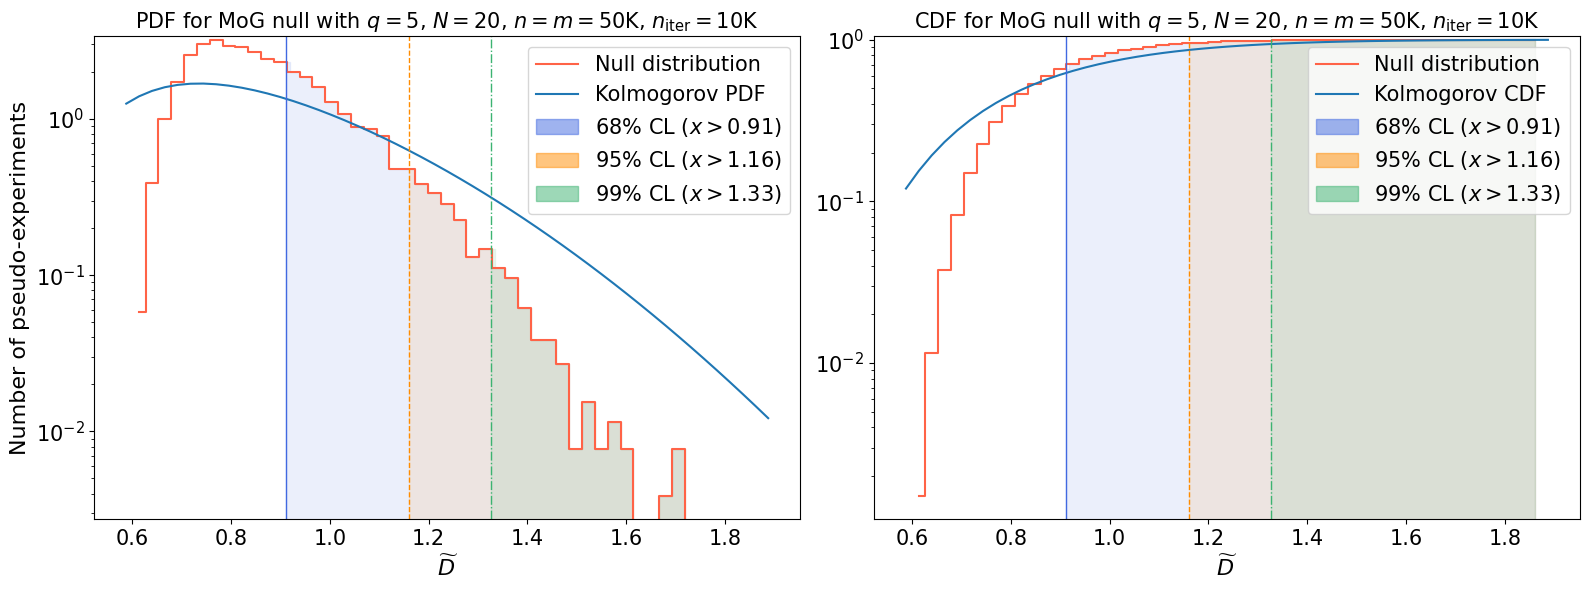

Time elapsed: 1.3029219219461083 seconds.
mu = 0.6287967949926487 +/- 0.00040991203234614157
sigma = 0.2024628440840792 +/- 0.0017930541509977623


/tmp/ipykernel_2598324/1904285626.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2598324/1904285626.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2598324/1904285626.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2598324/1904285626.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


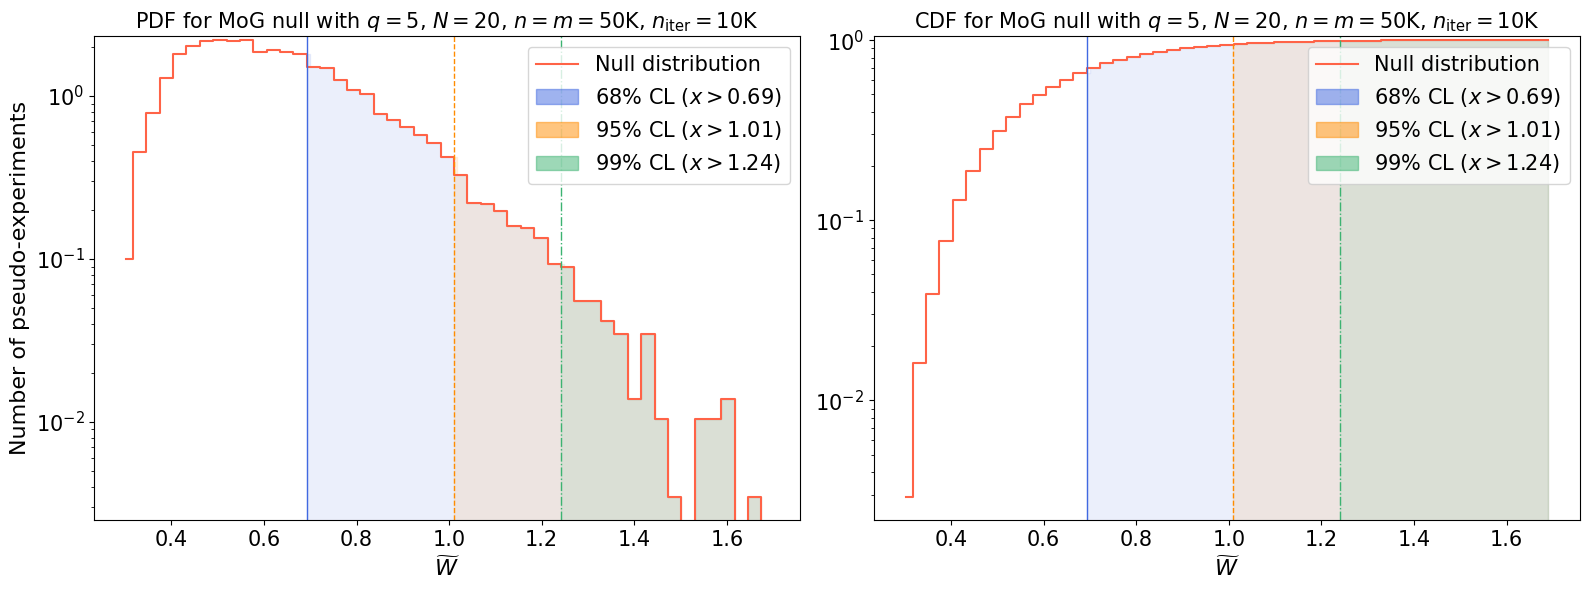

Time elapsed: 0.9510320220142603 seconds.


name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f2fd1ce27a0>   
1          metric_list  <function <lambda> at 0x7f2fd1ce2840>   
2          metric_list  <function <lambda> at 0x7f2fd1ce3ec0>   
3      statistic_means  <function <lambda> at 0x7f2fd1ce3f60>   
4         metric_means  <function <lambda> at 0x7f2fd00d0040>   
5         metric_means  <function <lambda> at 0x7f2fd00d00e0>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f2fd00d0180>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1               lambda ns, ndims: 1000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 50000, 'ba...            200   
1  {'niter': 10000, 'batch_size_test': 50000, 'ba...             50   
2  {'niter': 10000, 'batch_size_test': 50000, 'ba...              1   
3  {'niter': 10000, 'batch_size_test': 50000, 'ba...           5000   
4  {'niter': 10000, 'batch_size_test': 50000, 'ba...            100   
5  {'niter': 10000, 'batch_size_test': 50000, 'ba...            100   
6  {'niter': 10000, 'batch_size_test': 50000, 'ba...            100   

                        latex  \
0  $\overline{\|\cdot\|}_{F}$   
1          $d_{\mathrm{FPD}}$   
2          $d_{\mathrm{KPD}}$   
3              $\overline{D}$   
4             $\widetilde{D}$   
5             $\widetilde{W}$   
6                   $t_{\mu}$   

                                           null_file  \
0  ../results_leonardo/20D_50K/null_hypothesis/FN...   
1  ../results_leonardo/20D_50K/null_hypothesis/FP...   
2  ../results_leonardo/20D_50K/null_hypothesis/KP...   
3  ../results_leonardo/20D_50K/null_hypothesis/KS...   
4  ../results_leonardo/20D_50K/null_hypothesis/SK...   
5  ../results_leonardo/20D_50K/null_hypothesis/SW...   
6  ../results_leonardo/20D_50K/null_hypothesis/LR...   

                                          thresholds  \
0  [[0.68, [6800, 3199], 0.6785144811910258], [0....   
1  [[0.68, [6800, 3199], 0.30998923839973586], [0...   
2  [[0.68, [6800, 3199], -0.012572873258065442], ...   
3  [[0.68, [6800, 3199], 0.9195917501004521], [0....   
4  [[0.68, [6800, 3199], 0.9118751448364196], [0....   
5  [[0.68, [6800, 3199], 0.6926097825260524], [0....   
6                                                 []   

                                         null_figure  
0  ../results_leonardo/20D_50K/null_hypothesis/FN...  
1  ../results_leonardo/20D_50K/null_hypothesis/FP...  
2  ../results_leonardo/20D_50K/null_hypothesis/KP...  
3  ../results_leonardo/20D_50K/null_hypothesis/KS...  
4  ../results_leonardo/20D_50K/null_hypothesis/SK...  
5  ../results_leonardo/20D_50K/null_hypothesis/SW...  
6                                                NaN

In [ ]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    if "FPD" in latex:
        latex = r"$d_{\mathrm{FPD}}\,(\times 10^{3})$"
    elif "KPD" in latex:
        latex = r"$d_{\mathrm{KPD}}\,(\times 10^{4})$"
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [ ]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [ ]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 5.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Computing exclusion limits for fn with mean deformation.

=============== fn - only mean ===============

------------ 1 ------------
eps = 2.5
statistic = 40.72461212627922 - next threshold = 0.966201426908678 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.907298385945285

------------ 2 ------------
eps = 1.25
statistic = 23.26639731780531 - next threshold = 0.966201426908678 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.8405121238398845

------------ 3 ------------
eps = 0.625
statistic = 12.508337120179192 - next threshold = 0.966201426908678 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.713177138190756

------------ 4 ------------
eps = 0.3125
statistic = 6.497005703440122 - next threshold = 0.966201426908678 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.4821521578948744

------------ 5 ------------
eps = 0.15625
statistic = 3.355729292512863 - next threshold = 0.966201426908678 at 0.95 CL
relative_error_eps = 2.0
rela

### Likelihood-ratio test

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [ ]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Computing exclusion limits for lr with mean deformation.

=============== lr - only mean ===============

------------ 1 ------------
eps = 0.005
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 100
Iterating from 0 to 100 out of 10000 .
Iterating from 100 to 200 out of 10000 .
Iterating from 200 to 300 out of 10000 .
Iterating from 300 to 400 out of 10000 .
Iterating from 400 to 500 out of 10000 .
Iterating from 500 to 600 out of 10000 .
Iterating from 600 to 700 out of 10000 .
Iterating from 700 to 800 out of 1

### Show and save results

In [ ]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


In [ ]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [ ]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
18        lr        mean   20  10000                50000   
9         ks        mean   20  10000                50000   
0         fn        mean   20  10000                50000   
12       sks        mean   20  10000                50000   
3        fpd        mean   20  10000                50000   
15       swd        mean   20  10000                50000   
6        kpd        mean   20  10000                50000   

    $\epsilon^{\mu}_{95\%\mathrm{CL}}$ $\epsilon^{\mu}_{99\%\mathrm{CL}}$  \
18                             0.00020                             0.0003   
9                              0.00525                            0.00702   
0                              0.03342                            0.04478   
12                             0.03647                            0.04753   
3                              0.05260                             0.0674   
15                             0.05905                            0.08167   
6                              0.88257                            0.95696   

    $t^{\mu}$ (s)  
18           4094  
9            1547  
0            1195  
12           1388  
3            1318  
15           1202  
6            1297

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
18        lr                             0.00020   
9         ks                             0.00525   
0         fn                             0.03342   
12       sks                             0.03647   
3        fpd                             0.05260   
15       swd                             0.05905   
6        kpd                             0.88257   

   $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  
18                             0.0003           4094  
9                             0.00702           1547  
0                             0.04478           1195  
12                            0.04753           1388  
3                              0.0674           1318  
15                            0.08167           1202  
6                             0.95696           1297

In [ ]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
19        lr         std   20  10000                50000   
10        ks         std   20  10000                50000   
13       sks         std   20  10000                50000   
4        fpd         std   20  10000                50000   
16       swd         std   20  10000                50000   
1         fn         std   20  10000                50000   
7        kpd         std   20  10000                50000   

    $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19                                0.00049   
10                                0.01247   
13                                0.10834   
4                                 0.16144   
16                                0.18005   
1                                 0.30884   
7                                 4.98047   

   $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                               0.00062              4114  
10                               0.01696              1424  
13                               0.14715              1254  
4                                0.21282              1144  
16                               0.25654              1054  
1                                0.40161               935  
7                                    N/A              6400

Statistic  $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19        lr                                0.00049   
10        ks                                0.01247   
13       sks                                0.10834   
4        fpd                                0.16144   
16       swd                                0.18005   
1         fn                                0.30884   
7        kpd                                4.98047   

   $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                               0.00062              4114  
10                               0.01696              1424  
13                               0.14715              1254  
4                                0.21282              1144  
16                               0.25654              1054  
1                                0.40161               935  
7                                    N/A              6400

In [ ]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
20        lr        both   20  10000                50000   
11        ks        both   20  10000                50000   
2         fn        both   20  10000                50000   
14       sks        both   20  10000                50000   
5        fpd        both   20  10000                50000   
17       swd        both   20  10000                50000   
8        kpd        both   20  10000                50000   

    $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20                                    0.00023   
11                                    0.00475   
2                                     0.03311   
14                                    0.03403   
5                                     0.05028   
17                                    0.05447   
8                                     0.87921   

   $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                   0.00031                  4271  
11                                   0.00629                  1583  
2                                    0.04418                  1173  
14                                   0.04448                  1411  
5                                    0.06448                  1274  
17                                    0.0753                  1217  
8                                    0.95366                  1429

Statistic  $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20        lr                                    0.00023   
11        ks                                    0.00475   
2         fn                                    0.03311   
14       sks                                    0.03403   
5        fpd                                    0.05028   
17       swd                                    0.05447   
8        kpd                                    0.87921   

   $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                   0.00031                  4271  
11                                   0.00629                  1583  
2                                    0.04418                  1173  
14                                   0.04448                  1411  
5                                    0.06448                  1274  
17                                    0.0753                  1217  
8                                    0.95366                  1429

In [ ]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

/tmp/ipykernel_2598324/2797441218.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")


Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
0  $\overline{\|\cdot\|}_{F}$                             0.03342   
1          $d_{\mathrm{FPD}}$                             0.05260   
2          $d_{\mathrm{KPD}}$                             0.88257   
3              $\overline{D}$                             0.00525   
4          $t_{\mathrm{LLR}}$                             0.00020   
5             $\widetilde{D}$                             0.03647   
6             $\widetilde{W}$                             0.05905   

   $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  \
0                             0.04478           1195   
1                             0.06740           1318   
2                             0.95696           1297   
3                             0.00702           1547   
4                             0.00030           4094   
5                             0.04753           1388   
6                             0.08167           1202   

   $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
0                                0.30884   
1                                0.16144   
2                                4.98047   
3                                0.01247   
4                                0.00049   
5                                0.10834   
6                                0.18005   

  $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  \
0                               0.40161               935   
1                               0.21282              1144   
2                                   N/A              6400   
3                               0.01696              1424   
4                               0.00062              4114   
5                               0.14715              1254   
6                               0.25654              1054   

   $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
0                                    0.03311   
1                                    0.05028   
2                                    0.87921   
3                                    0.00475   
4                                    0.00023   
5                                    0.03403   
6                                    0.05447   

   $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  \
0                                    0.04418                  1173   
1                                    0.06448                  1274   
2                                    0.95366                  1429   
3                                    0.00629                  1583   
4                                    0.00031                  4271   
5                                    0.04448                  1411   
6                                    0.07530                  1217   

  $t^{\mathrm{null}}$ (s)  
0                      57  
1                     308  
2                   21299  
3                     180  
4                       -  
5                     588  
6                     349

\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$\overline{\|\cdot\|}_{F}$ & 0.033 & 0.045 & 1195 & 0.31 & 0.4 & 935 & 0.033 & 0.044 & 1173 & 57 \\
$d_{\mathrm{FPD}}$ & 0.053 & 0.067 & 1318 & 0.16 & 0.21 & 1144 & 0.05 & 0.064 & 1274 & 308 \\
$d_{\mathrm{KPD}}$ & 0.88 & 0.96 & 1297 & 5 & N/A & 6400 & 0.88 & 0.95 & 1429 & 21299 \\
$\overline{D}$ & 0.0053 & 0.007 & 1547 & 0.012 & 0.017 & 1424 & 0.0047 & 0.0063 & 1583 & 180 \\
$t_{\mathrm{LLR}}$ & 0.0002 & 0.0003 & 4094 & 0.00049 & 0.00062 & 4114 & 0.00023 & 0.00031 & 4271 & - \\
$\widetilde{D}$ & 0.036 & 0.048 & 1388 & 0.11 & 0.15 & 1254 & 0.034 & 0.044 & 1411 & 588 \\
$\widetilde{W}$ & 0.059 & 0.082 & 

# Fixed $n=100000$

## Null hypotheses

### Model definition

In [ ]:
seed = 0
ncomp = 5
ndims = 20
niter = 10_000
batch_size_test = 100_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (20,) (20,)


In [ ]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [ ]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 1000000000
batch_size 100000
niter 10000
niter * batch_size 1000000000
small_sample False


In [ ]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               block_size = 10_000,
                               num_batches = 1,
                               batch_size = 100_000)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [ ]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

niter  batch_size_test  batch_size_gen  small_sample_threshold dtype_input  \
0  10000           100000           10000                10000000     float64   

   seed  use_tf  mirror_strategy strategy  verbose  ...  ndims_1  nsamples_1  \
0     0    True            False     None     True  ...       20           0   

   is_symb_2  ndims_2  nsamples_2    dtype ndims    nsamples  small_sample  \
0       True       20           0  float64    20  1000000000         False   

   ncomp  
0      5  

[1 rows x 21 columns]

In [ ]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1000,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 1000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 100000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 20,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 20,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 20,
   'nsamples': 1000000000,
   'small_sample': False,
   'ncomp': 5},
  'max_vectorize': 100,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results_leonardo/20D_100K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'res

### Evaluate null hypotheses

In [ ]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from ../results_leonardo/20D_100K/null_hypothesis/FN.json
Loading fpd from ../results_leonardo/20D_100K/null_hypothesis/FPD.json
Loading kpd from ../results_leonardo/20D_100K/null_hypothesis/KPD.json
Loading ks from ../results_leonardo/20D_100K/null_hypothesis/KS.json
Loading sks from ../results_leonardo/20D_100K/null_hypothesis/SKS.json
Loading swd from ../results_leonardo/20D_100K/null_hypothesis/SWD.json


In [ ]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.6749719325551948], [0.95, [9500, 500], 0.963216877881332], [0.99, [9900, 100], 1.1631330827329083]]
Computing time for metric fn: 74.6914902778808
ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.15719269438501948], [0.95, [9500, 500], 0.19955446678755973], [0.99, [9900, 100], 0.2773631645122508]]
Computing time for metric fpd: 618.3357173549011
ThresholdS for metric kpd: [[0.68, [6800, 3199], -0.009056738754198435], [0.95, [9500, 500], 0.012248082058530231], [0.99, [9900, 100], 0.025453598686420165]]
Computing time for metric kpd: 30322.396213724976
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9177951599814705], [0.95, [9500, 500], 1.1893658979760033], [0.99, [9900, 100], 1.385021992615276]]
Computing time for metric ks: 277.417651316151
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9168789846737446], [0.95, [9500, 500], 1.170024215635068], [0.99, [9900, 100], 1.3546998469604685]]
Computing time for metric sks: 727.42130058

name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f1a0e4efa60>   
1          metric_list  <function <lambda> at 0x7f1a0e4ee700>   
2          metric_list  <function <lambda> at 0x7f1a0e4efd80>   
3      statistic_means  <function <lambda> at 0x7f1a0e4efe20>   
4         metric_means  <function <lambda> at 0x7f1a0e4efec0>   
5         metric_means  <function <lambda> at 0x7f1a0e4eff60>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f1a0404c040>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1               lambda ns, ndims: 1000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 100000, 'b...            100   
1  {'niter': 10000, 'batch_size_test': 100000, 'b...             20   
2  {'niter': 10000, 'batch_size_test': 100000, 'b...              1   
3  {'niter': 10000, 'batch_size_test': 100000, 'b...           2000   
4  {'niter': 10000, 'batch_size_test': 100000, 'b...            100   
5  {'niter': 10000, 'batch_size_test': 100000, 'b...            100   
6  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   

                        latex  \
0  $\overline{\|\cdot\|}_{F}$   
1          $d_{\mathrm{FPD}}$   
2          $d_{\mathrm{KPD}}$   
3              $\overline{D}$   
4             $\widetilde{D}$   
5             $\widetilde{W}$   
6                   $t_{\mu}$   

                                           null_file  \
0  ../results_leonardo/20D_100K/null_hypothesis/F...   
1  ../results_leonardo/20D_100K/null_hypothesis/F...   
2  ../results_leonardo/20D_100K/null_hypothesis/K...   
3  ../results_leonardo/20D_100K/null_hypothesis/K...   
4  ../results_leonardo/20D_100K/null_hypothesis/S...   
5  ../results_leonardo/20D_100K/null_hypothesis/S...   
6  ../results_leonardo/20D_100K/null_hypothesis/L...   

                                          thresholds  
0  [[0.68, [6800, 3199], 0.6749719325551948], [0....  
1  [[0.68, [6800, 3199], 0.15719269438501948], [0...  
2  [[0.68, [6800, 3199], -0.009056738754198435], ...  
3  [[0.68, [6800, 3199], 0.9177951599814705], [0....  
4  [[0.68, [6800, 3199], 0.9168789846737446], [0....  
5  [[0.68, [6800, 3199], 0.700256537559456], [0.9...  
6                                                 []

### Plots of null-distributions

mu = 0.6107089529778571 +/- 0.00036024181358382447
sigma = 0.18980037238736505 +/- 0.001566323100247874


/tmp/ipykernel_344246/1904285626.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_344246/1904285626.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_344246/1904285626.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_344246/1904285626.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


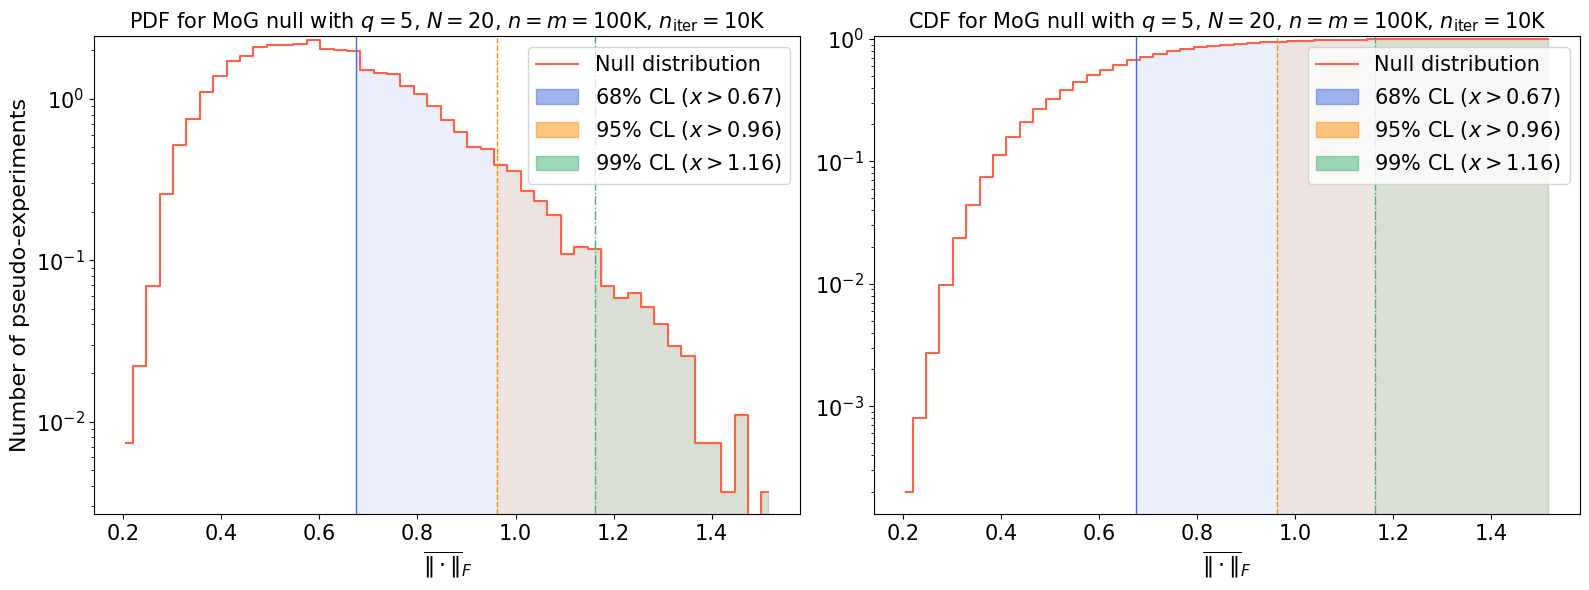

Time elapsed: 1.608140509109944 seconds.
mu = 0.1525468817260675 +/- 7.842643945544193e-06
sigma = 0.028004720933342993 +/- 0.0005278705608002241


/tmp/ipykernel_344246/1904285626.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_344246/1904285626.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_344246/1904285626.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_344246/1904285626.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


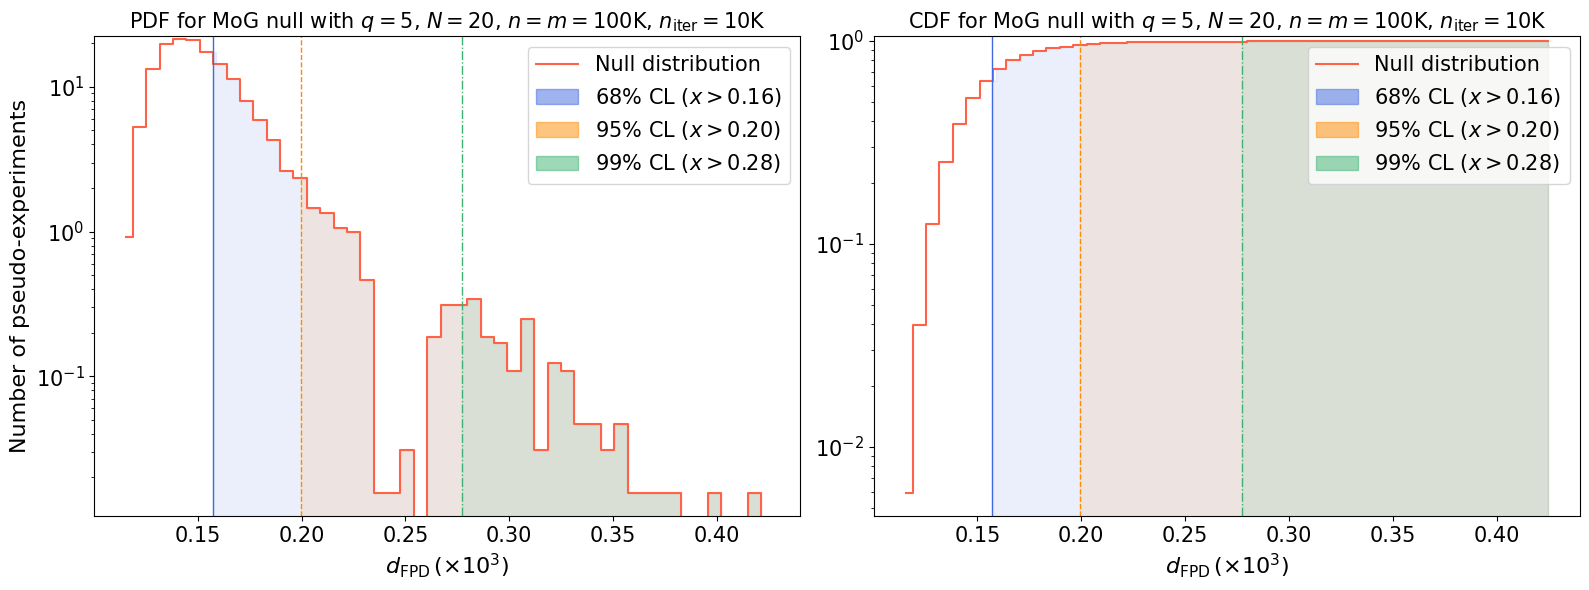

Time elapsed: 0.9123312998563051 seconds.
mu = -0.015205714110713236 +/- 2.3636413186219025e-06
sigma = 0.015374138410401743 +/- 0.00012107723862841464


/tmp/ipykernel_344246/1904285626.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_344246/1904285626.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_344246/1904285626.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_344246/1904285626.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


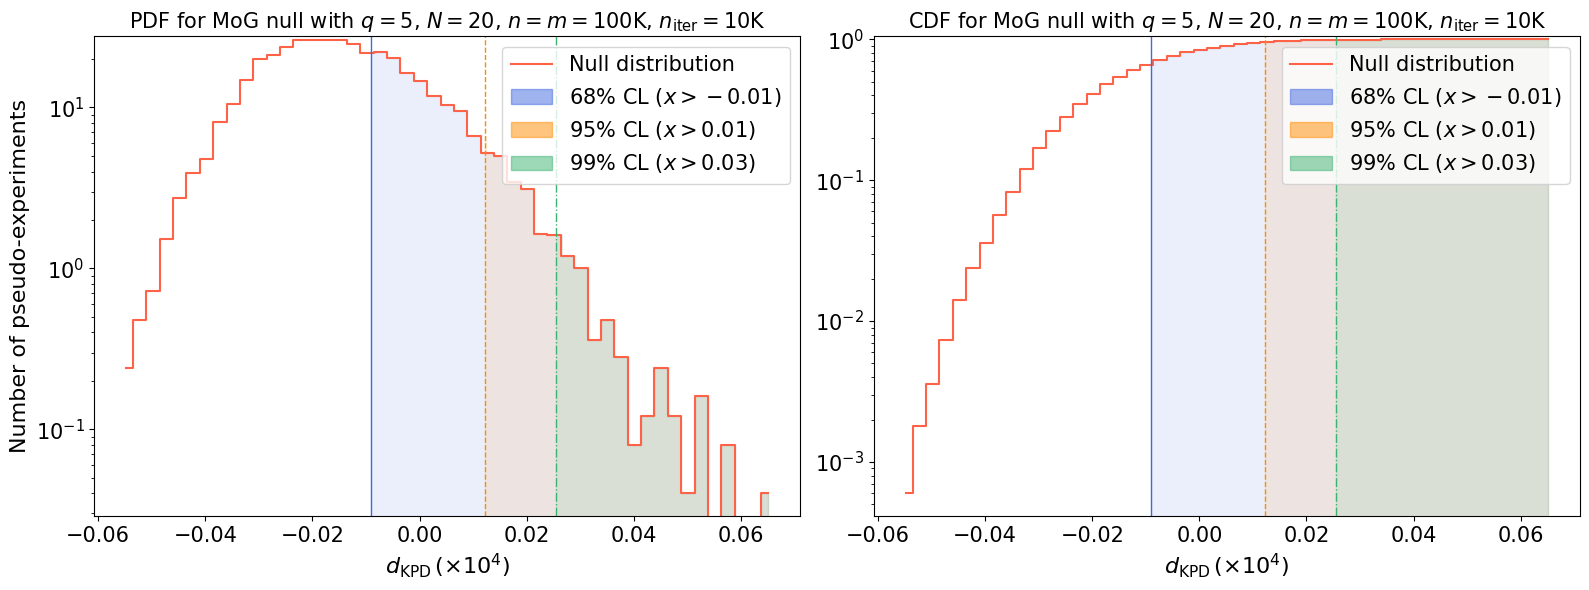

Time elapsed: 0.9700011741369963 seconds.
mu = 0.8712141947012199 +/- 0.0002739730038575218
sigma = 0.1655212988885484 +/- 0.001581628496656723


/tmp/ipykernel_344246/1904285626.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_344246/1904285626.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_344246/1904285626.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_344246/1904285626.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


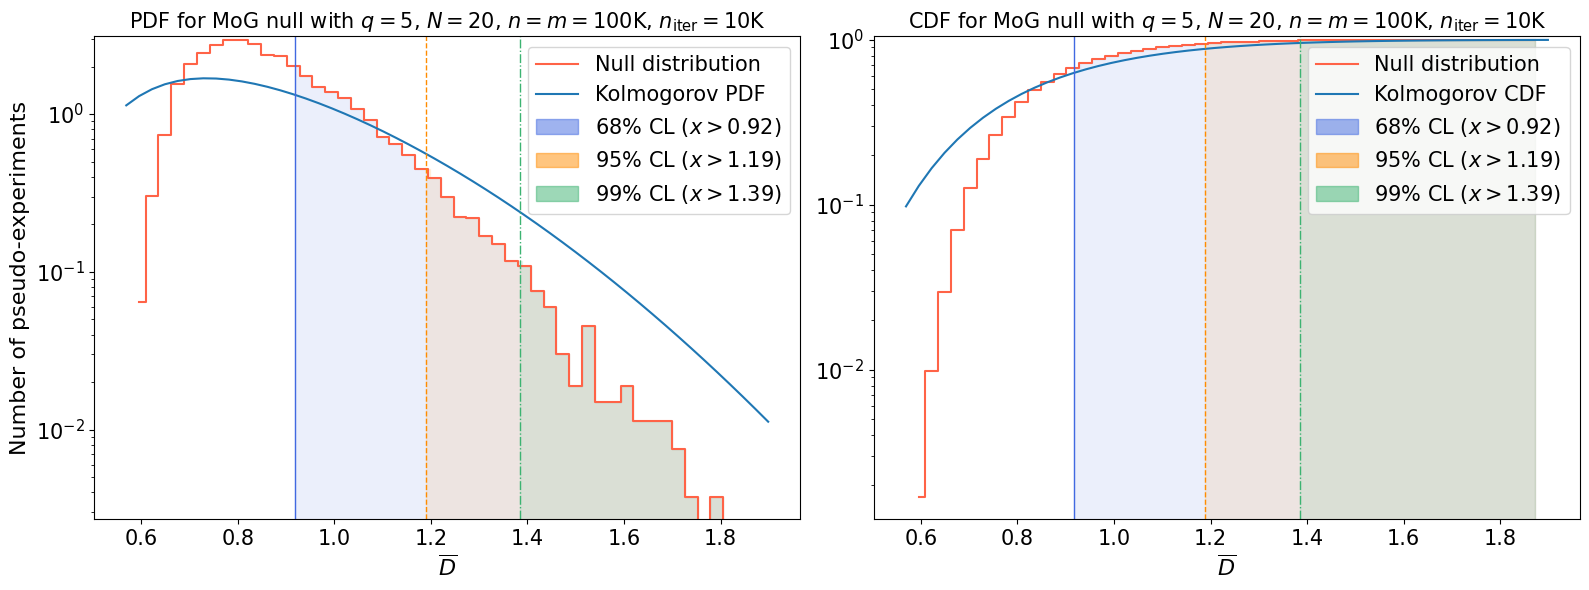

Time elapsed: 1.2481071429792792 seconds.
mu = 0.8708943339587834 +/- 0.0002445563281378403
sigma = 0.15638296842618132 +/- 0.0014885699064338955


/tmp/ipykernel_344246/1904285626.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_344246/1904285626.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_344246/1904285626.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_344246/1904285626.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


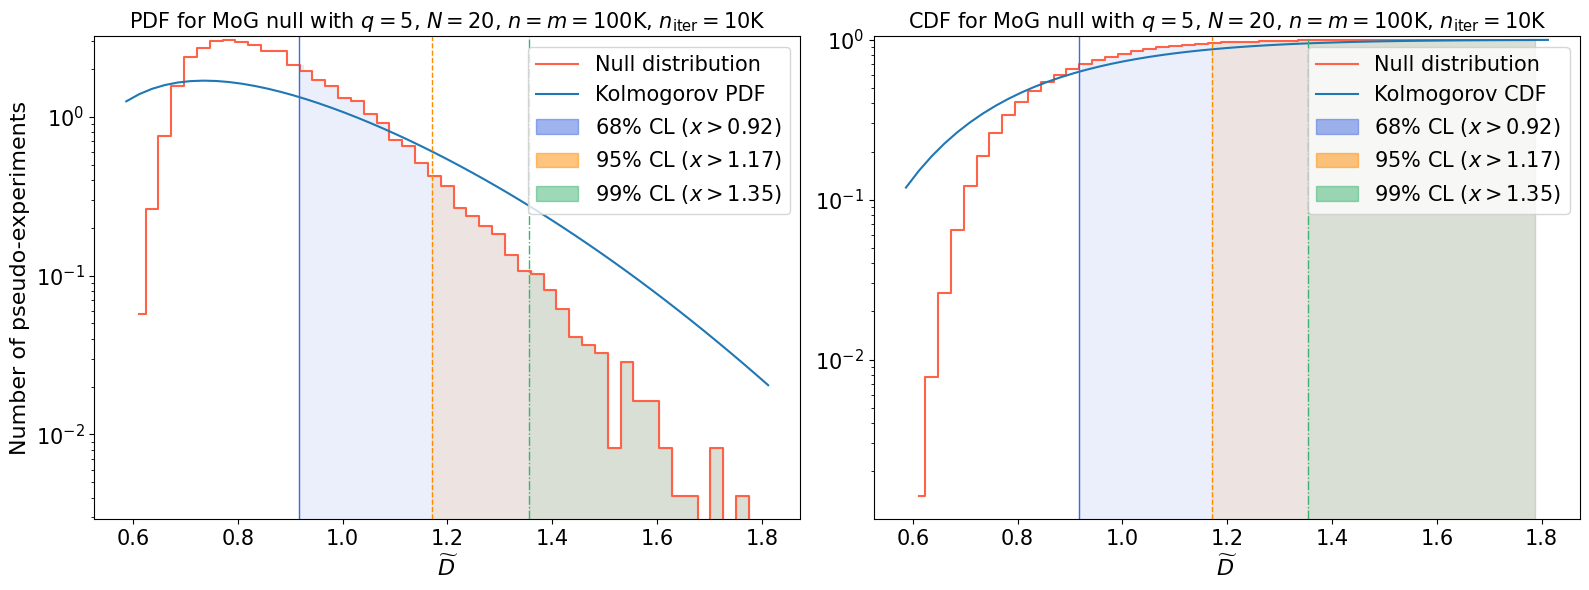

Time elapsed: 1.2426354130730033 seconds.
mu = 0.6359429883792597 +/- 0.0004308685911672494
sigma = 0.20757374380379842 +/- 0.0019082151956146378


/tmp/ipykernel_344246/1904285626.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_344246/1904285626.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_344246/1904285626.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_344246/1904285626.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


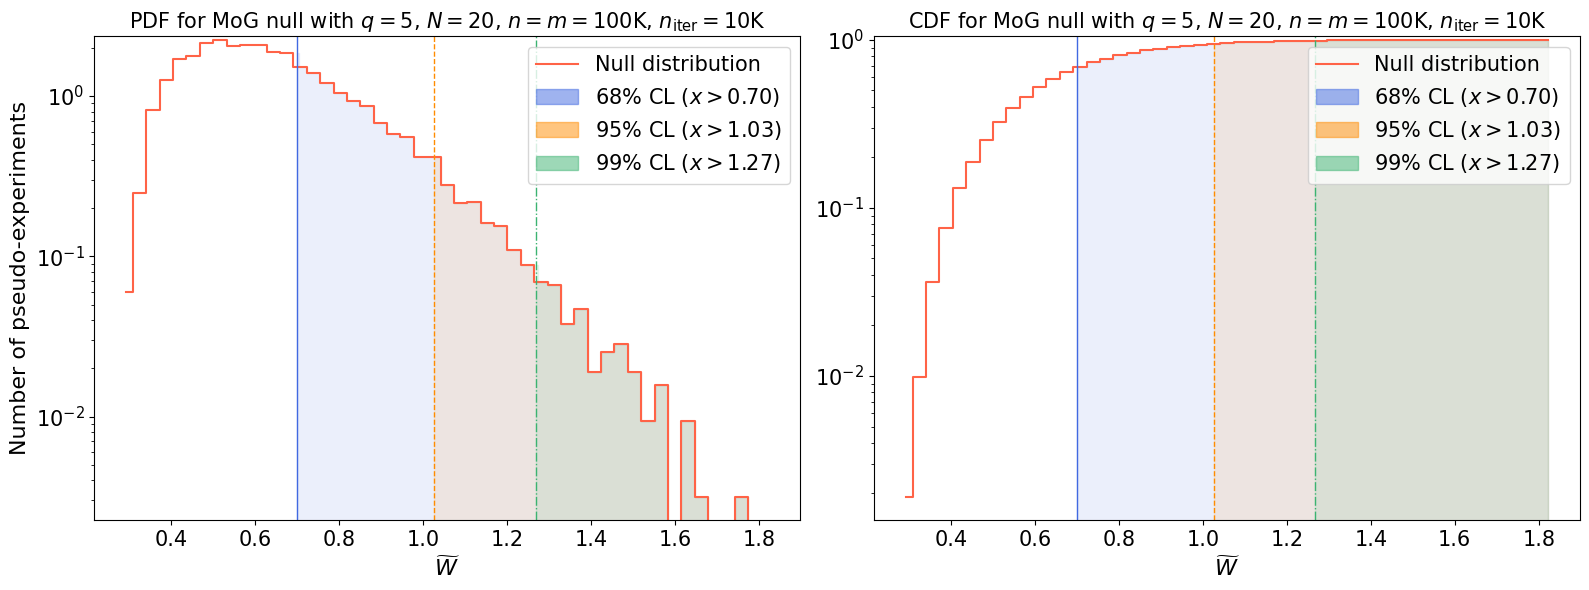

Time elapsed: 0.9064463910181075 seconds.


name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f1a0e4efa60>   
1          metric_list  <function <lambda> at 0x7f1a0e4ee700>   
2          metric_list  <function <lambda> at 0x7f1a0e4efd80>   
3      statistic_means  <function <lambda> at 0x7f1a0e4efe20>   
4         metric_means  <function <lambda> at 0x7f1a0e4efec0>   
5         metric_means  <function <lambda> at 0x7f1a0e4eff60>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f1a0404c040>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1               lambda ns, ndims: 1000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 100000, 'b...            100   
1  {'niter': 10000, 'batch_size_test': 100000, 'b...             20   
2  {'niter': 10000, 'batch_size_test': 100000, 'b...              1   
3  {'niter': 10000, 'batch_size_test': 100000, 'b...           2000   
4  {'niter': 10000, 'batch_size_test': 100000, 'b...            100   
5  {'niter': 10000, 'batch_size_test': 100000, 'b...            100   
6  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   

                        latex  \
0  $\overline{\|\cdot\|}_{F}$   
1          $d_{\mathrm{FPD}}$   
2          $d_{\mathrm{KPD}}$   
3              $\overline{D}$   
4             $\widetilde{D}$   
5             $\widetilde{W}$   
6                   $t_{\mu}$   

                                           null_file  \
0  ../results_leonardo/20D_100K/null_hypothesis/F...   
1  ../results_leonardo/20D_100K/null_hypothesis/F...   
2  ../results_leonardo/20D_100K/null_hypothesis/K...   
3  ../results_leonardo/20D_100K/null_hypothesis/K...   
4  ../results_leonardo/20D_100K/null_hypothesis/S...   
5  ../results_leonardo/20D_100K/null_hypothesis/S...   
6  ../results_leonardo/20D_100K/null_hypothesis/L...   

                                          thresholds  \
0  [[0.68, [6800, 3199], 0.6749719325551948], [0....   
1  [[0.68, [6800, 3199], 0.15719269438501948], [0...   
2  [[0.68, [6800, 3199], -0.009056738754198435], ...   
3  [[0.68, [6800, 3199], 0.9177951599814705], [0....   
4  [[0.68, [6800, 3199], 0.9168789846737446], [0....   
5  [[0.68, [6800, 3199], 0.700256537559456], [0.9...   
6                                                 []   

                                         null_figure  
0  ../results_leonardo/20D_100K/null_hypothesis/F...  
1  ../results_leonardo/20D_100K/null_hypothesis/F...  
2  ../results_leonardo/20D_100K/null_hypothesis/K...  
3  ../results_leonardo/20D_100K/null_hypothesis/K...  
4  ../results_leonardo/20D_100K/null_hypothesis/S...  
5  ../results_leonardo/20D_100K/null_hypothesis/S...  
6                                                NaN

In [ ]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    if "FPD" in latex:
        latex = r"$d_{\mathrm{FPD}}\,(\times 10^{3})$"
    elif "KPD" in latex:
        latex = r"$d_{\mathrm{KPD}}\,(\times 10^{4})$"
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [ ]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [ ]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 20.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fn with mean deformation already loaded.
Exclusion limits for fn with std deformation already loaded.
Exclusion limits for fn with both deformation already loaded.
Exclusion limits for fpd with mean deformation already loaded.
Exclusion limits for fpd with std deformation already loaded.
Exclusion limits for fpd with both deformation already loaded.
Exclusion limits for kpd with mean deformation already loaded.
Exclusion limits for kpd with std deformation already loaded.
Exclusion limits for kpd with both deformation already loaded.
Exclusion limits for ks with mean deformation already loaded.
Exclusion limits for ks with std deformation already loaded.
Exclusion limits for ks with both deformation already loaded.
Exclusion limits for sks with mean deformation already loaded.
Exclusion limits for sks with std deformation already loaded.
Exclusion limits for sks with both deformation already loaded.
Exclusion limits for swd with mean deformation already loaded.
Exc

### Likelihood-ratio test

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [ ]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Exclusion limits for LR with mean deformation already loaded.
Exclusion limits for LR with std deformation already loaded.
Computing exclusion limits for lr with both deformation.

=============== lr - mean+std ===============

------------ 1 ------------
eps = 0.005
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 200
Iterating from 0 to 50 out of 10000 .


I0000 00:00:1712928989.112831  344246 service.cc:145] XLA service 0xc1b9cc00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712928989.113135  344246 service.cc:153]   StreamExecutor device (0): NVIDIA A100-SXM-64GB, Compute Capability 8.0
W0000 00:00:1712928989.230502  344246 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_1/Assert/Assert
W0000 00:00:1712928989.235556  344246 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_3/Assert/Assert
W0000 00:00:1712928989.238949  344246 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_5/Assert/Assert
W0000 00:00:1712928989.239248  344246 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_7/Assert/Assert
W0000 00:00:1712928989.240116  344246 assert_op.cc:38] Ignoring Assert operator while/M

Iterating from 50 to 100 out of 10000 .
Iterating from 100 to 150 out of 10000 .
Iterating from 150 to 200 out of 10000 .
Iterating from 200 to 250 out of 10000 .
Iterating from 250 to 300 out of 10000 .
Iterating from 300 to 350 out of 10000 .
Iterating from 350 to 400 out of 10000 .
Iterating from 400 to 450 out of 10000 .
Iterating from 450 to 500 out of 10000 .
Iterating from 500 to 550 out of 10000 .
Iterating from 550 to 600 out of 10000 .
Iterating from 600 to 650 out of 10000 .
Iterating from 650 to 700 out of 10000 .
Iterating from 700 to 750 out of 10000 .
Iterating from 750 to 800 out of 10000 .
Iterating from 800 to 850 out of 10000 .
Iterating from 850 to 900 out of 10000 .
Iterating from 900 to 950 out of 10000 .
Iterating from 950 to 1000 out of 10000 .
Iterating from 1000 to 1050 out of 10000 .
Iterating from 1050 to 1100 out of 10000 .
Iterating from 1100 to 1150 out of 10000 .
Iterating from 1150 to 1200 out of 10000 .
Iterating from 1200 to 1250 out of 10000 .
Iterat

### Show and save results

In [ ]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


In [ ]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [ ]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
18        lr        mean   20  10000               100000   
9         ks        mean   20  10000               100000   
0         fn        mean   20  10000               100000   
12       sks        mean   20  10000               100000   
3        fpd        mean   20  10000               100000   
15       swd        mean   20  10000               100000   
6        kpd        mean   20  10000               100000   

    $\epsilon^{\mu}_{95\%\mathrm{CL}}$  $\epsilon^{\mu}_{99\%\mathrm{CL}}$  \
18                             0.00014                             0.00020   
9                              0.00318                             0.00468   
0                              0.02266                             0.03192   
12                             0.02388                             0.03284   
3                              0.03128                             0.04660   
15                             0.04166                             0.05876   
6                              0.76599                             0.80941   

    $t^{\mu}$ (s)  
18           3868  
9            1515  
0            1252  
12           1369  
3            1250  
15           1231  
6            1378

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
18        lr                             0.00014   
9         ks                             0.00318   
0         fn                             0.02266   
12       sks                             0.02388   
3        fpd                             0.03128   
15       swd                             0.04166   
6        kpd                             0.76599   

    $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  
18                             0.00020           3868  
9                              0.00468           1515  
0                              0.03192           1252  
12                             0.03284           1369  
3                              0.04660           1250  
15                             0.05876           1231  
6                              0.80941           1378

In [ ]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
19        lr         std   20  10000               100000   
10        ks         std   20  10000               100000   
13       sks         std   20  10000               100000   
4        fpd         std   20  10000               100000   
16       swd         std   20  10000               100000   
1         fn         std   20  10000               100000   
7        kpd         std   20  10000               100000   

    $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19                                0.00021   
10                                0.00813   
13                                0.07538   
4                                 0.09552   
16                                0.12878   
1                                 0.17029   
7                                 5.21729   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00030              3778  
10                                0.01182              1408  
13                                0.10574              1232  
4                                 0.14401              1131  
16                                0.18527              1066  
1                                 0.25165               986  
7                                 5.38330              1318

Statistic  $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19        lr                                0.00021   
10        ks                                0.00813   
13       sks                                0.07538   
4        fpd                                0.09552   
16       swd                                0.12878   
1         fn                                0.17029   
7        kpd                                5.21729   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00030              3778  
10                                0.01182              1408  
13                                0.10574              1232  
4                                 0.14401              1131  
16                                0.18527              1066  
1                                 0.25165               986  
7                                 5.38330              1318

In [ ]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
20        lr        both   20  10000               100000   
11        ks        both   20  10000               100000   
2         fn        both   20  10000               100000   
14       sks        both   20  10000               100000   
5        fpd        both   20  10000               100000   
17       swd        both   20  10000               100000   
8        kpd        both   20  10000               100000   

    $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20                                    0.00011   
11                                    0.00291   
2                                     0.02220   
14                                    0.02266   
5                                     0.02968   
17                                    0.03891   
8                                     0.75867   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00016                  3772  
11                                    0.00419                  1526  
2                                     0.03116                  1202  
14                                    0.03101                  1372  
5                                     0.04439                  1298  
17                                    0.05450                  1254  
8                                     0.80319                  1439

Statistic  $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20        lr                                    0.00011   
11        ks                                    0.00291   
2         fn                                    0.02220   
14       sks                                    0.02266   
5        fpd                                    0.02968   
17       swd                                    0.03891   
8        kpd                                    0.75867   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00016                  3772  
11                                    0.00419                  1526  
2                                     0.03116                  1202  
14                                    0.03101                  1372  
5                                     0.04439                  1298  
17                                    0.05450                  1254  
8                                     0.80319                  1439

In [ ]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
0  $\overline{\|\cdot\|}_{F}$                             0.02266   
1          $d_{\mathrm{FPD}}$                             0.03128   
2          $d_{\mathrm{KPD}}$                             0.76599   
3              $\overline{D}$                             0.00318   
4          $t_{\mathrm{LLR}}$                             0.00014   
5             $\widetilde{D}$                             0.02388   
6             $\widetilde{W}$                             0.04166   

   $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  \
0                             0.03192           1252   
1                             0.04660           1250   
2                             0.80941           1378   
3                             0.00468           1515   
4                             0.00020           3868   
5                             0.03284           1369   
6                             0.05876           1231   

   $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
0                                0.17029   
1                                0.09552   
2                                5.21729   
3                                0.00813   
4                                0.00021   
5                                0.07538   
6                                0.12878   

   $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  \
0                                0.25165               986   
1                                0.14401              1131   
2                                5.38330              1318   
3                                0.01182              1408   
4                                0.00030              3778   
5                                0.10574              1232   
6                                0.18527              1066   

   $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
0                                    0.02220   
1                                    0.02968   
2                                    0.75867   
3                                    0.00291   
4                                    0.00011   
5                                    0.02266   
6                                    0.03891   

   $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  \
0                                    0.03116                  1202   
1                                    0.04439                  1298   
2                                    0.80319                  1439   
3                                    0.00419                  1526   
4                                    0.00016                  3772   
5                                    0.03101                  1372   
6                                    0.05450                  1254   

  $t^{\mathrm{null}}$ (s)  
0                      74  
1                     618  
2                   30322  
3                     277  
4                       -  
5                     727  
6                     398

\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$\overline{\|\cdot\|}_{F}$ & 0.023 & 0.032 & 1252 & 0.17 & 0.25 & 986 & 0.022 & 0.031 & 1202 & 74 \\
$d_{\mathrm{FPD}}$ & 0.031 & 0.047 & 1250 & 0.096 & 0.14 & 1131 & 0.03 & 0.044 & 1298 & 618 \\
$d_{\mathrm{KPD}}$ & 0.77 & 0.81 & 1378 & 5.2 & 5.4 & 1318 & 0.76 & 0.8 & 1439 & 30322 \\
$\overline{D}$ & 0.0032 & 0.0047 & 1515 & 0.0081 & 0.012 & 1408 & 0.0029 & 0.0042 & 1526 & 277 \\
$t_{\mathrm{LLR}}$ & 0.00014 & 0.0002 & 3868 & 0.00021 & 0.0003 & 3778 & 0.00011 & 0.00016 & 3772 & - \\
$\widetilde{D}$ & 0.024 & 0.033 & 1369 & 0.075 & 0.11 & 1232 & 0.023 & 0.031 & 1372 & 727 \\
$\widetilde{W}$ & 0.042 & 0.

# Fixed $\epsilon$

In [11]:
fpd_results = {5: {10_000: [[0.68, 0.00010175550386551708], 
                            [0.95, 0.00015583746551772079], 
                            [0.99, 0.00022347410983350775]],
                   50_000: [[0.68, 4.5226688115357585e-05], 
                            [0.95, 5.398123973119404e-05], 
                            [0.99, 6.354077850007809e-05]],
                   100_000 : [[0.68, 3.725127064668703e-05], 
                              [0.95, 4.0825583153507725e-05], 
                              [0.99, 4.465564257168013e-05]]},
               20: {10_000: [[0.68, 0.0006669445748113884], 
                             [0.95, 0.0013217846893085318], 
                             [0.99, 0.0019605548728214763]],
                    100_000 : [[0.68, 0.00015735387007512796], 
                               [0.95, 0.0001991294338873111], 
                               [0.99, 0.00028358152805583374]]},
               100: {10_000: [[0.68, 0.0060367495598200515], 
                              [0.95, 0.009021833572706342], 
                              [0.99, 0.011125954730711617]],
                    100_000 : [[0.68, 0.000817842570244682], 
                               [0.95, 0.0011978135448655475], 
                               [0.99, 0.001414743609381014]]}}
fpd_results

{5: {10000: [[0.68, 0.00010175550386551708],
   [0.95, 0.00015583746551772079],
   [0.99, 0.00022347410983350775]],
  50000: [[0.68, 4.5226688115357585e-05],
   [0.95, 5.398123973119404e-05],
   [0.99, 6.354077850007809e-05]],
  100000: [[0.68, 3.725127064668703e-05],
   [0.95, 4.0825583153507725e-05],
   [0.99, 4.465564257168013e-05]]},
 20: {10000: [[0.68, 0.0006669445748113884],
   [0.95, 0.0013217846893085318],
   [0.99, 0.0019605548728214763]],
  100000: [[0.68, 0.00015735387007512796],
   [0.95, 0.0001991294338873111],
   [0.99, 0.00028358152805583374]]},
 100: {10000: [[0.68, 0.0060367495598200515],
   [0.95, 0.009021833572706342],
   [0.99, 0.011125954730711617]],
  100000: [[0.68, 0.000817842570244682],
   [0.95, 0.0011978135448655475],
   [0.99, 0.001414743609381014]]}}

In [24]:
def define_norm_df(dic,x,y):
    # Flatten the dictionary to a list of rows
    rows = []
    for N, n_dict in dic.items():
        for n, values in n_dict.items():
            row = {'N': N, 'n': n}
            for confidence, value in values:
                row[confidence] = value*(N**x)*(n**y)
            rows.append(row)

    # Convert the list of rows to a DataFrame
    df = pd.DataFrame(rows)

    # Optionally, rename the columns for clarity
    df.rename(columns={0.68: '0.68', 0.95: '0.95', 0.99: '0.99'}, inplace=True)
    return df

df = define_norm_df(fpd_results,-1/2,1/2)
# Show the DataFrame
display(df)

df = define_norm_df(fpd_results,-2/3,2/3)
# Show the DataFrame
display(df)

N       n      0.68      0.95      0.99
0    5   10000  0.004551  0.006969  0.009994
1    5   50000  0.004523  0.005398  0.006354
2    5  100000  0.005268  0.005774  0.006315
3   20   10000  0.014913  0.029556  0.043839
4   20  100000  0.011127  0.014081  0.020052
5  100   10000  0.060367  0.090218  0.111260
6  100  100000  0.025862  0.037878  0.044738

N       n      0.68      0.95      0.99
0    5   10000  0.016153  0.024738  0.035474
1    5   50000  0.020992  0.025056  0.029493
2    5  100000  0.027447  0.030081  0.032903
3   20   10000  0.042015  0.083267  0.123507
4   20  100000  0.046011  0.058226  0.082920
5  100   10000  0.130058  0.194370  0.239701
6  100  100000  0.081784  0.119781  0.141474